<a href="https://colab.research.google.com/github/coding-dojo-data-science/Example-Project-Analyzing-Ames-Housing/blob/main/Example_Ames_CRISP_DM_Project_Notebook_COMPLETE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing House Prices in Ames Iowa
Complete Project Notebook.

- Student Name: Example Project

# Introduction


<center><img src="https://raw.githubusercontent.com/coding-dojo-data-science/Example-Project-Analyzing-Ames-Housing/main/Images/house-image.png" width=800px>

<a href="https://dolinskigroup.com/buy-home/sellers-concessions">Image Source</a></center>

We've been hired by a group of homeowners who are concerned about the value of their homes decreasing before they sell them. They have asked us to take the raw house price data from their hometown, Ames, Iowa to be able to give them data-driven recommendations on how to best increase the value of their home.



We will be following the CRISP-DM workflow for our analysis.  

<center>
<img src="https://raw.githubusercontent.com/coding-dojo-data-science/Example-Project-Analyzing-Ames-Housing/main/Images/CRISP-DM.png" width=600px>


<a href="https://www.datascience-pm.com/crisp-dm-2">Image Source</a></center>



## Table of Contents

- [Phase 1) Business Understanding](#phase1)
- [Phase 2) Data Understanding](#phase2)
- [Phase 3) Data Preparation](#phase3)
- [Phase 4) Modeling](#phase4)
- [Phase 5) Evaluation](#phase5)
- [Phase 6) Deployment](#phase6)



<a name='phase1'></a>
# Phase 1) Business Understanding



**Our stakeholders are:**
- People who already own homes in Ames, Iowa

**Their primary goal is:**
- Increase the resale value of their homes.

**They plan to:**
- Modify/renovate their homes based on our analysis.

**What do they need/expect?**
- Actionable insights/recommendations for which modifications they can make to increase the price of their homes.


<a name='phase2'></a>
# Phase 2) Data Understanding



## 2.1) What data have we been provided?





<p>The stakeholders have provided us with two links:</p>
<ul><li> <a href="https://drive.google.com/file/d/1Jach7HsZVywhJnUJmkyqje52ho_0VJgo/view?usp=sharing" target="_blank">Share URL to a .csv file</a> <ul><li>A spreadsheet of various features of homes in their town, as well as the price of the house at the time of sale. </li></ul></li><li><a href="https://docs.google.com/document/d/1nmnel7g35aMOl0mKiSsTHXT8wRzbJ1EktKNqYFEmpWE/edit?usp=sharing" target="_blank">A Data Dictionary File</a><ul><li>A data dictionary is a document that lists the name and explanation for every feature in a dataset.</li></ul></li></ul>
<p>(Note, this is a modified version of the original Ames Iowa Housing dataset found on <a href="https://www.kaggle.com/datasets/marcopale/housing" target="_blank">Kaggle</a>)</p>


In [1]:
# from IPython.display import clear_output
# !pip install shap
# clear_output()

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)

import missingno as msno
## Setting the max_columns to 50
pd.set_option('display.max_columns',50)

In [4]:
from sklearn import set_config
set_config(transform_output='pandas')#, display='text')

In [5]:
# Load in the data
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/ames-housing-dojo.csv"
df = pd.read_csv(fpath)
# Preview first 5 rows
df.head()

Unnamed: 0        PID MS Zoning  Lot Frontage  Lot Area Street Alley  \
0           0  907227090        RL            60      7200   Pave   NaN   
1           1  527108010        RL           134     19378   Pave   NaN   
2           2  534275170        RL            -1     12772   Pave   NaN   
3           3  528104050        RL           114     14803   Pave   NaN   
4           4  533206070        FV            32      3784   Pave  Pave   

  Utilities Neighborhood Bldg Type House Style  Overall Qual  Overall Cond  \
0    AllPub      CollgCr      1Fam      1Story             5             8   
1    AllPub      Gilbert      1Fam      2Story             7             5   
2    AllPub        NAmes      1Fam      1Story             6             8   
3    AllPub      NridgHt      1Fam      1Story            10             5   
4    AllPub      Somerst    TwnhsE      1Story             8             5   

   Year Built  Year Remod/Add Exter Qual Exter Cond  Bsmt Unf SF  \
0        1972            1972         TA         TA        427.0   
1        2005            2006         Gd         TA       1335.0   
2        1960            1998         TA         Gd        460.0   
3        2007            2008         Ex         TA        442.0   
4        2006            2007         Gd         TA       1451.0   

   Total Bsmt SF Central Air Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  \
0          864.0           Y     864sqft             0.0             0.0   
1         1392.0           Y    2462sqft             1.0             0.0   
2          958.0           Y     958sqft             0.0             0.0   
3         2078.0           Y    2084sqft             1.0             0.0   
4         1511.0           Y    1565sqft             1.0             0.0   

   Full Bath Half Bath  Bedroom  Kitchen  TotRms AbvGrd Garage Type  \
0          1         0        3        1              5      Detchd   
1          2         1        4        1              9      Attchd   
2          1         0        2        1              5      Attchd   
3          2         0        2        1              7      Attchd   
4          2         0        2        1              5      Attchd   

   Garage Yr Blt  Garage Cars  Garage Area Garage Qual Garage Cond  \
0         1977.0          1.0        297.0          TA          TA   
1         2006.0          2.0        576.0          TA          TA   
2         1960.0          1.0        301.0          TA          TA   
3         2007.0          3.0       1220.0          TA          TA   
4         2006.0          2.0        476.0          TA          TA   

  Paved Drive  Fence Date Sold  SalePrice  
0           Y  MnPrv   03-2006   119900.0  
1           Y    NaN   03-2006   320000.0  
2           Y    NaN   04-2007   151500.0  
3           Y    NaN   06-2008   385000.0  
4           Y    NaN   02-2007   193800.0


## **2.2) What information is included in the data?**


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2959 entries, 0 to 2958
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2959 non-null   int64  
 1   PID             2959 non-null   int64  
 2   MS Zoning       2959 non-null   object 
 3   Lot Frontage    2959 non-null   int64  
 4   Lot Area        2959 non-null   int64  
 5   Street          2959 non-null   object 
 6   Alley           201 non-null    object 
 7   Utilities       2959 non-null   object 
 8   Neighborhood    2959 non-null   object 
 9   Bldg Type       2959 non-null   object 
 10  House Style     2959 non-null   object 
 11  Overall Qual    2959 non-null   int64  
 12  Overall Cond    2959 non-null   int64  
 13  Year Built      2959 non-null   int64  
 14  Year Remod/Add  2959 non-null   int64  
 15  Exter Qual      2959 non-null   object 
 16  Exter Cond      2959 non-null   object 
 17  Bsmt Unf SF     2958 non-null   f



- The file had 2,959 rows and 38 columns.
- There is a mixture of datatypes:
  - 8 float
  - 12 float
  - 18 object
- Since numeric features are sometimes stored as object dtype, we will inspect the object columns next and look for columns that should be converted.

### Inspecting Object Columns for Numeric Features 

In [7]:
# Preview all object columns
df.select_dtypes("object").head()

MS Zoning Street Alley Utilities Neighborhood Bldg Type House Style  \
0        RL   Pave   NaN    AllPub      CollgCr      1Fam      1Story   
1        RL   Pave   NaN    AllPub      Gilbert      1Fam      2Story   
2        RL   Pave   NaN    AllPub        NAmes      1Fam      1Story   
3        RL   Pave   NaN    AllPub      NridgHt      1Fam      1Story   
4        FV   Pave  Pave    AllPub      Somerst    TwnhsE      1Story   

  Exter Qual Exter Cond Central Air Gr Liv Area Half Bath Garage Type  \
0         TA         TA           Y     864sqft         0      Detchd   
1         Gd         TA           Y    2462sqft         1      Attchd   
2         TA         Gd           Y     958sqft         0      Attchd   
3         Ex         TA           Y    2084sqft         0      Attchd   
4         Gd         TA           Y    1565sqft         0      Attchd   

  Garage Qual Garage Cond Paved Drive  Fence Date Sold  
0          TA          TA           Y  MnPrv   03-2006  
1          TA          TA           Y    NaN   03-2006  
2          TA          TA           Y    NaN   04-2007  
3          TA          TA           Y    NaN   06-2008  
4          TA          TA           Y    NaN   02-2007

- **Object columns that should be converted to numeric:**
  - [ ] Half Bath
  - [ ] Living Area Sqft (after removing"sqft" from each row)

### Converting Object Columns to Numeric

#### Half Bath

In [8]:
try:
  df["Half Bath"] = df['Half Bath'].astype(float)
except Exception as e:
  display(e)

ValueError("could not convert string to float: '?'")

- There is a "?" that cannot be converted to float, which we will replace with a NaN.

In [9]:
# Replace the "?" with a null value and convert to float
df['Half Bath'] = df['Half Bath'].replace("?",np.nan)
df["Half Bath"] = df['Half Bath'].astype(float)

#### Gr Living Area

In [10]:
## Removing the units (sqft) before and convert to float
df['Gr Liv Area'] = df['Gr Liv Area'].str.replace("sqft",'')
df['Gr Liv Area'] = df['Gr Liv Area'].astype(float)

In [11]:
# Confirm no additional object cols to convert
df.select_dtypes('object').head()

MS Zoning Street Alley Utilities Neighborhood Bldg Type House Style  \
0        RL   Pave   NaN    AllPub      CollgCr      1Fam      1Story   
1        RL   Pave   NaN    AllPub      Gilbert      1Fam      2Story   
2        RL   Pave   NaN    AllPub        NAmes      1Fam      1Story   
3        RL   Pave   NaN    AllPub      NridgHt      1Fam      1Story   
4        FV   Pave  Pave    AllPub      Somerst    TwnhsE      1Story   

  Exter Qual Exter Cond Central Air Garage Type Garage Qual Garage Cond  \
0         TA         TA           Y      Detchd          TA          TA   
1         Gd         TA           Y      Attchd          TA          TA   
2         TA         Gd           Y      Attchd          TA          TA   
3         Ex         TA           Y      Attchd          TA          TA   
4         Gd         TA           Y      Attchd          TA          TA   

  Paved Drive  Fence Date Sold  
0           Y  MnPrv   03-2006  
1           Y    NaN   03-2006  
2           Y    NaN   04-2007  
3           Y    NaN   06-2008  
4           Y    NaN   02-2007

### **What is the meaning of each feature?**


Please see the <a href="https://docs.google.com/document/d/1nmnel7g35aMOl0mKiSsTHXT8wRzbJ1EktKNqYFEmpWE/edit?usp=sharing" target="_blank">Data Dictionary File</a> for full details.



**After consulting the data dictionary, we noticed there are 2 features not included in the data dictionary:**
- [ ] **"Unnamed: 0"**: There is an erroneous index column that is not in the data dictionary, and should be dropped.



- [ ] **"PID"** column that is not included in the data dictionary.
  - Based on the preview above it looks like it may be a unique identifier, and can be either dropped or used as the index after checking for duplicates.


**There were several features with ambiguous column names.**
The following will be renamed for clarity:
  - "Year Remod/Add" -> "Year Remodeled"
  - "Bsmt Unf SF" -> "Bsmt Unf Sqft"
  - "Total Bsmt SF" -> "Total Bsmnt Sqft"
  - "TotRms AbvGrd" -> "Total Rooms"
  - "Gr Liv Area" -> "Living Area Sqft"




| Original Column   | Renamed Column   |
|:------------------|:-----------------|
| Year Remod/Add    | Year Remodeled   |
| Bsmt Unf SF       | Bsmt Unf Sqft    |
| Total Bsmt SF     | Total Bsmnt Sqft |
| TotRms AbvGrd     | Total Rooms      |
| Gr Liv Area       | Living Area Sqft |

In [12]:
# Dropping index column
df = df.drop(columns=['Unnamed: 0'])
df

PID MS Zoning  Lot Frontage  Lot Area Street Alley Utilities  \
0     907227090        RL            60      7200   Pave   NaN    AllPub   
1     527108010        RL           134     19378   Pave   NaN    AllPub   
2     534275170        RL            -1     12772   Pave   NaN    AllPub   
3     528104050        RL           114     14803   Pave   NaN    AllPub   
4     533206070        FV            32      3784   Pave  Pave    AllPub   
...         ...       ...           ...       ...    ...   ...       ...   
2954  903400030        RL            50     11672   Pave  Pave    AllPub   
2955  533234020        FV            79     10646   Pave   NaN    AllPub   
2956  908188140        RM            24      2522   Pave   NaN    AllPub   
2957  909254050        RL            54      7609   Pave   NaN    AllPub   
2958  902201120        RM            50      6000   Pave   NaN    AllPub   

     Neighborhood Bldg Type House Style  Overall Qual  Overall Cond  \
0         CollgCr      1Fam      1Story             5             8   
1         Gilbert      1Fam      2Story             7             5   
2           NAmes      1Fam      1Story             6             8   
3         NridgHt      1Fam      1Story            10             5   
4         Somerst    TwnhsE      1Story             8             5   
...           ...       ...         ...           ...           ...   
2954      BrkSide      1Fam      1Story             5             5   
2955      Somerst      1Fam      2Story             7             5   
2956      Edwards     Twnhs      2Story             7             5   
2957      Crawfor      1Fam      2Story             8             9   
2958      OldTown      1Fam      1Story             5             5   

      Year Built  Year Remod/Add Exter Qual Exter Cond  Bsmt Unf SF  \
0           1972            1972         TA         TA        427.0   
1           2005            2006         Gd         TA       1335.0   
2           1960            1998         TA         Gd        460.0   
3           2007            2008         Ex         TA        442.0   
4           2006            2007         Gd         TA       1451.0   
...          ...             ...        ...        ...          ...   
2954        1925            1950         TA         TA        816.0   
2955        2001            2001         TA         TA        177.0   
2956        2004            2004         Gd         TA        970.0   
2957        1925            1997         Gd         Gd        392.0   
2958        1948            1950         TA         TA        516.0   

      Total Bsmt SF Central Air  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  \
0             864.0           Y        864.0             0.0             0.0   
1            1392.0           Y       2462.0             1.0             0.0   
2             958.0           Y        958.0             0.0             0.0   
3            2078.0           Y       2084.0             1.0             0.0   
4            1511.0           Y       1565.0             1.0             0.0   
...             ...         ...          ...             ...             ...   
2954          816.0           Y        816.0             0.0             0.0   
2955          858.0           Y       1789.0             1.0             0.0   
2956          970.0           Y       1709.0             0.0             0.0   
2957          798.0           Y       1512.0             1.0             0.0   
2958          789.0           Y        789.0             0.0             0.0   

      Full Bath  Half Bath  Bedroom  Kitchen  TotRms AbvGrd Garage Type  \
0             1        0.0        3        1              5      Detchd   
1             2        1.0        4        1              9      Attchd   
2             1        0.0        2        1              5      Attchd   
3             2        0.0        2        1              7      Attchd   
4             2        0.0        2        1             

In [13]:
## Rename features with more intuitive names
rename_dict = {"Year Remod/Add":"Year Remodeled",
               "Bsmt Unf SF": "Bsmt Unf Sqft",
               "Total Bsmt SF": "Total Bsmnt Sqft",
               "TotRms AbvGrd": "Total Rooms",
               "Gr Liv Area":"Living Area Sqft"}

df = df.rename(rename_dict,axis=1)
df.head()

PID MS Zoning  Lot Frontage  Lot Area Street Alley Utilities  \
0  907227090        RL            60      7200   Pave   NaN    AllPub   
1  527108010        RL           134     19378   Pave   NaN    AllPub   
2  534275170        RL            -1     12772   Pave   NaN    AllPub   
3  528104050        RL           114     14803   Pave   NaN    AllPub   
4  533206070        FV            32      3784   Pave  Pave    AllPub   

  Neighborhood Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
0      CollgCr      1Fam      1Story             5             8        1972   
1      Gilbert      1Fam      2Story             7             5        2005   
2        NAmes      1Fam      1Story             6             8        1960   
3      NridgHt      1Fam      1Story            10             5        2007   
4      Somerst    TwnhsE      1Story             8             5        2006   

   Year Remodeled Exter Qual Exter Cond  Bsmt Unf Sqft  Total Bsmnt Sqft  \
0            1972         TA         TA          427.0             864.0   
1            2006         Gd         TA         1335.0            1392.0   
2            1998         TA         Gd          460.0             958.0   
3            2008         Ex         TA          442.0            2078.0   
4            2007         Gd         TA         1451.0            1511.0   

  Central Air  Living Area Sqft  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
0           Y             864.0             0.0             0.0          1   
1           Y            2462.0             1.0             0.0          2   
2           Y             958.0             0.0             0.0          1   
3           Y            2084.0             1.0             0.0          2   
4           Y            1565.0             1.0             0.0          2   

   Half Bath  Bedroom  Kitchen  Total Rooms Garage Type  Garage Yr Blt  \
0        0.0        3        1            5      Detchd         1977.0   
1        1.0        4        1            9      Attchd         2006.0   
2        0.0        2        1            5      Attchd         1960.0   
3        0.0        2        1            7      Attchd         2007.0   
4        0.0        2        1            5      Attchd         2006.0   

   Garage Cars  Garage Area Garage Qual Garage Cond Paved Drive  Fence  \
0          1.0        297.0          TA          TA           Y  MnPrv   
1          2.0        576.0          TA          TA           Y    NaN   
2          1.0        301.0          TA          TA           Y    NaN   
3          3.0       1220.0          TA          TA           Y    NaN   
4          2.0        476.0          TA          TA           Y    NaN   

  Date Sold  SalePrice  
0   03-2006   119900.0  
1   03-2006   320000.0  
2   04-2007   151500.0  
3   06-2008   385000.0  
4   02-2007   193800.0

In [14]:
# # Code for creating markdown table for readme
# rename_table = pd.DataFrame({'Original Column': rename_dict.keys(),
#                              "Renamed Column": rename_dict.values()})
# rename_table.to_markdown(index=False)


## **2.3) How clean is the data?**



### Are there duplicate rows?


In [15]:
# Include the first row along with all dupicates
duplicated_rows = df.duplicated()
duplicated_rows.sum()

7



- [ ] There were 7 duplicate rows that we will drop.


In [16]:
# # Display duplicates 
# df[duplicated_rows].sort_values("PID")

In [17]:
## Drop duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

- Checking for duplicate PID's. 



Because we have already removed rows that were identical for every feature, we know that there will be differences between the features for any rows with duplicate PIDs.

Therefore, we will specify keep=False in df.duplicated() so we can see compare the rows that share a PID.


In [18]:
## Check unique id col for duplicates'
duplicated_pids = df.duplicated(subset=['PID'], keep=False)
duplicated_pids.sum()

44

- There are 22 rows with duplicate PID's (44 total). 

- To find which duplicate rows to drop, we will filter for the duplicate and sort by PID to align the rows by PID, so we can compare the values in each feature.

In [19]:
# Visualizing duplicates
df[duplicated_pids].sort_values("PID")

PID MS Zoning  Lot Frontage  Lot Area Street Alley Utilities  \
2654  526355080        RL            75     13860   Pave   NaN    AllPub   
1650  526355080        RL            75     13860   Pave   NaN    AllPub   
135   527110020        RL            -1      8530   Pave   NaN    AllPub   
2469  527110020        RL            -1      8530   Pave   NaN    AllPub   
626   527326040        RL            85     11900   Pave   NaN    AllPub   
625   527326040        RL            85     11900   Pave   NaN    AllPub   
2341  528178070        RL           130     16900   Pave   NaN    AllPub   
929   528178070        RL           130     16900   Pave   NaN    AllPub   
2599  528429100        RL            49     15218   Pave   NaN    AllPub   
324   528429100        RL            49     15218   Pave   NaN    AllPub   
1660  528477070        FV            84     10603   Pave   NaN    AllPub   
1946  528477070        FV            84     10603   Pave   NaN    AllPub   
2867  531376070        RL            81      9260   Pave   NaN    AllPub   
1266  531376070        RL            81      9260   Pave   NaN    AllPub   
2219  533206060        FV            80      3523   Pave  Pave    AllPub   
1153  533206060        FV            80      3523   Pave  Pave    AllPub   
747   534104090        FV            -1      7050   Pave   NaN    AllPub   
2192  534104090        FV            -1      7050   Pave   NaN    AllPub   
801   535303050        RL            75     11310   Pave   NaN    AllPub   
185   535303050        RL            75     11310   Pave   NaN    AllPub   
692   535350040        RL            74      5868   Pave   NaN    AllPub   
602   535350040        RL            74      5868   Pave   NaN    AllPub   
938   902128160        RM            60      7200   Pave   NaN    AllPub   
2916  902128160        RM            60      7200   Pave   NaN    AllPub   
581   902202090        RM            75      9000   Pave   NaN    AllPub   
354   902202090        RM            75      9000   Pave   NaN    AllPub   
286   902300040        RM            53      9863   Pave  Pave    AllPub   
1303  902300040        RM            53      9863   Pave  Pave    AllPub   
51    903234160        RM            60      6180   Pave   NaN    AllPub   
1196  903234160        RM            60      6180   Pave   NaN    AllPub   
71    905476120        RL            50      8405   Pave  Grvl    AllPub   
2795  905476120        RL            50      8405   Pave  Grvl    AllPub   
2333  906380170        RL            64      7406   Pave   NaN    AllPub   
2706  906380170        RL            64      7406   Pave   NaN    AllPub   
2171  907262020        RL            65      8158   Pave   NaN    AllPub   
634   907262020        RL            65      8158   Pave   NaN    AllPub   
1093  907265100        RL            96     11690   Pave   NaN    AllPub   
1846  907265100        RL            96     11690   Pave   NaN    AllPub   
2460  909250080        RL            43      5707   Pave   NaN    AllPub   
88    909250080        RL            43      5707   Pave   NaN    AllPub   
1773  909251090        RL            79     11526   Pave   NaN    AllPub   
1474  909251090        RL            79     11526   Pave   NaN    AllPub   
1913  923228250        RM            21      2001   Pave   NaN    AllPub   
308   923228250        RM            21      2001   Pave   NaN    AllPub   

     Neighborhood Bldg Type House Style  Overall Qual  Overall Cond  \
2654        NAmes      1Fam        SLvl             8             7   
1650        NAmes      1Fam        SLvl             8             7   
135       Gilbert      1Fam        SLvl             7             5   
2469      Gilbert      1Fam        SLvl             7             5   
626        NWAmes      1Fam      1Story             7             5   
625        NWAmes      1Fam      1Story             7             5   
2341      NridgHt      1Fam      2Story             8             5   
929       NridgHt      

- In the 44 rows with duplicate PID rows, each duplicate had a duplicate PID that had a NaN for SalePrice.
  - A) We cannot have null values in SalePrice since it is our target, so we will drop null values from SalePrice only.
  - B) Also, by dropping the rows with null SalePrice, we may also remove the duplicate PID's.
  
- So we first drop null values from SalePrice and then check if there are still remiaining duplicate PID's.

In [20]:
# checking # of null values in SalePrice
df['SalePrice'].isna().sum()

22

In [21]:
# Dropping Null values from SalePrice
df = df.dropna(subset=["SalePrice"])
df['SalePrice'].isna().sum()

0

In [22]:
# Confirming  no more duplicated PIDs
df.duplicated(subset=['PID'], keep=False).sum()

0

- We have successfully removed rows with duplicate PID's while remoing null values for SalePrice.

#### Confirming PID is unique (to make it the index)

While we could drop PID and use the original integer index for the DataFrame, it would be better to use a true unique identifier that came from the original data source. 


In [23]:
# Checking if PID is 100% unique
df['PID'].nunique()/len(df) * 100

100.0

In [24]:
# Making PID the index
df = df.set_index("PID")
df

MS Zoning  Lot Frontage  Lot Area Street Alley Utilities  \
PID                                                                  
907227090        RL            60      7200   Pave   NaN    AllPub   
527108010        RL           134     19378   Pave   NaN    AllPub   
534275170        RL            -1     12772   Pave   NaN    AllPub   
528104050        RL           114     14803   Pave   NaN    AllPub   
533206070        FV            32      3784   Pave  Pave    AllPub   
...             ...           ...       ...    ...   ...       ...   
903400030        RL            50     11672   Pave  Pave    AllPub   
533234020        FV            79     10646   Pave   NaN    AllPub   
908188140        RM            24      2522   Pave   NaN    AllPub   
909254050        RL            54      7609   Pave   NaN    AllPub   
902201120        RM            50      6000   Pave   NaN    AllPub   

          Neighborhood Bldg Type House Style  Overall Qual  Overall Cond  \
PID                                                                        
907227090      CollgCr      1Fam      1Story             5             8   
527108010      Gilbert      1Fam      2Story             7             5   
534275170        NAmes      1Fam      1Story             6             8   
528104050      NridgHt      1Fam      1Story            10             5   
533206070      Somerst    TwnhsE      1Story             8             5   
...                ...       ...         ...           ...           ...   
903400030      BrkSide      1Fam      1Story             5             5   
533234020      Somerst      1Fam      2Story             7             5   
908188140      Edwards     Twnhs      2Story             7             5   
909254050      Crawfor      1Fam      2Story             8             9   
902201120      OldTown      1Fam      1Story             5             5   

           Year Built  Year Remodeled Exter Qual Exter Cond  Bsmt Unf Sqft  \
PID                                                                          
907227090        1972            1972         TA         TA          427.0   
527108010        2005            2006         Gd         TA         1335.0   
534275170        1960            1998         TA         Gd          460.0   
528104050        2007            2008         Ex         TA          442.0   
533206070        2006            2007         Gd         TA         1451.0   
...               ...             ...        ...        ...            ...   
903400030        1925            1950         TA         TA          816.0   
533234020        2001            2001         TA         TA          177.0   
908188140        2004            2004         Gd         TA          970.0   
909254050        1925            1997         Gd         Gd          392.0   
902201120        1948            1950         TA         TA          516.0   

           Total Bsmnt Sqft Central Air  Living Area Sqft  Bsmt Full Bath  \
PID                                                                         
907227090             864.0           Y             864.0             0.0   
527108010            1392.0           Y            2462.0             1.0   
534275170             958.0           Y             958.0             0.0   
528104050            2078.0           Y            2084.0             1.0   
533206070            1511.0           Y            1565.0             1.0   
...                     ...         ...               ...             ...   
903400030             816.0           Y             816.0             0.0   
533234020             858.0           Y            1789.0             1.0   
908188140             970.0           Y            1709.0             0.0   
909254050             798.0           Y            1512.0             1.0   
902201120             789.0           Y             789.0             0.0   

           Bsmt Half Bath  Full Bath  Half Bath  Bedroom  Kitchen  \
PID                     


### Are there missing values?



In [25]:
## Check for Null values
null_counts = df.isna().sum()
null_counts

MS Zoning              0
Lot Frontage           0
Lot Area               0
Street                 0
Alley               2732
Utilities              0
Neighborhood           0
Bldg Type              0
House Style            0
Overall Qual           0
Overall Cond           0
Year Built             0
Year Remodeled         0
Exter Qual             0
Exter Cond             0
Bsmt Unf Sqft          1
Total Bsmnt Sqft       1
Central Air            0
Living Area Sqft       0
Bsmt Full Bath         2
Bsmt Half Bath         2
Full Bath              0
Half Bath              3
Bedroom                0
Kitchen                0
Total Rooms            0
Garage Type          157
Garage Yr Blt        159
Garage Cars            1
Garage Area            1
Garage Qual          159
Garage Cond          159
Paved Drive            0
Fence               2358
Date Sold              0
SalePrice              0
dtype: int64

In [26]:
# Getting nulls as percent of total vallues
null_percent = null_counts/len(df) * 100
null_percent

MS Zoning            0.000000
Lot Frontage         0.000000
Lot Area             0.000000
Street               0.000000
Alley               93.242321
Utilities            0.000000
Neighborhood         0.000000
Bldg Type            0.000000
House Style          0.000000
Overall Qual         0.000000
Overall Cond         0.000000
Year Built           0.000000
Year Remodeled       0.000000
Exter Qual           0.000000
Exter Cond           0.000000
Bsmt Unf Sqft        0.034130
Total Bsmnt Sqft     0.034130
Central Air          0.000000
Living Area Sqft     0.000000
Bsmt Full Bath       0.068259
Bsmt Half Bath       0.068259
Full Bath            0.000000
Half Bath            0.102389
Bedroom              0.000000
Kitchen              0.000000
Total Rooms          0.000000
Garage Type          5.358362
Garage Yr Blt        5.426621
Garage Cars          0.034130
Garage Area          0.034130
Garage Qual          5.426621
Garage Cond          5.426621
Paved Drive          0.000000
Fence     

In [27]:
## Combining null_counts and null_percent above
null_report = pd.DataFrame({'# Null':null_counts,
                            '% Null':null_percent}).round(2)
null_report

# Null  % Null
MS Zoning              0    0.00
Lot Frontage           0    0.00
Lot Area               0    0.00
Street                 0    0.00
Alley               2732   93.24
Utilities              0    0.00
Neighborhood           0    0.00
Bldg Type              0    0.00
House Style            0    0.00
Overall Qual           0    0.00
Overall Cond           0    0.00
Year Built             0    0.00
Year Remodeled         0    0.00
Exter Qual             0    0.00
Exter Cond             0    0.00
Bsmt Unf Sqft          1    0.03
Total Bsmnt Sqft       1    0.03
Central Air            0    0.00
Living Area Sqft       0    0.00
Bsmt Full Bath         2    0.07
Bsmt Half Bath         2    0.07
Full Bath              0    0.00
Half Bath              3    0.10
Bedroom                0    0.00
Kitchen                0    0.00
Total Rooms            0    0.00
Garage Type          157    5.36
Garage Yr Blt        159    5.43
Garage Cars            1    0.03
Garage Area            1    0.03
Garage Qual          159    5.43
Garage Cond          159    5.43
Paved Drive            0    0.00
Fence               2358   80.48
Date Sold              0    0.00
SalePrice              0    0.00

<Axes: >

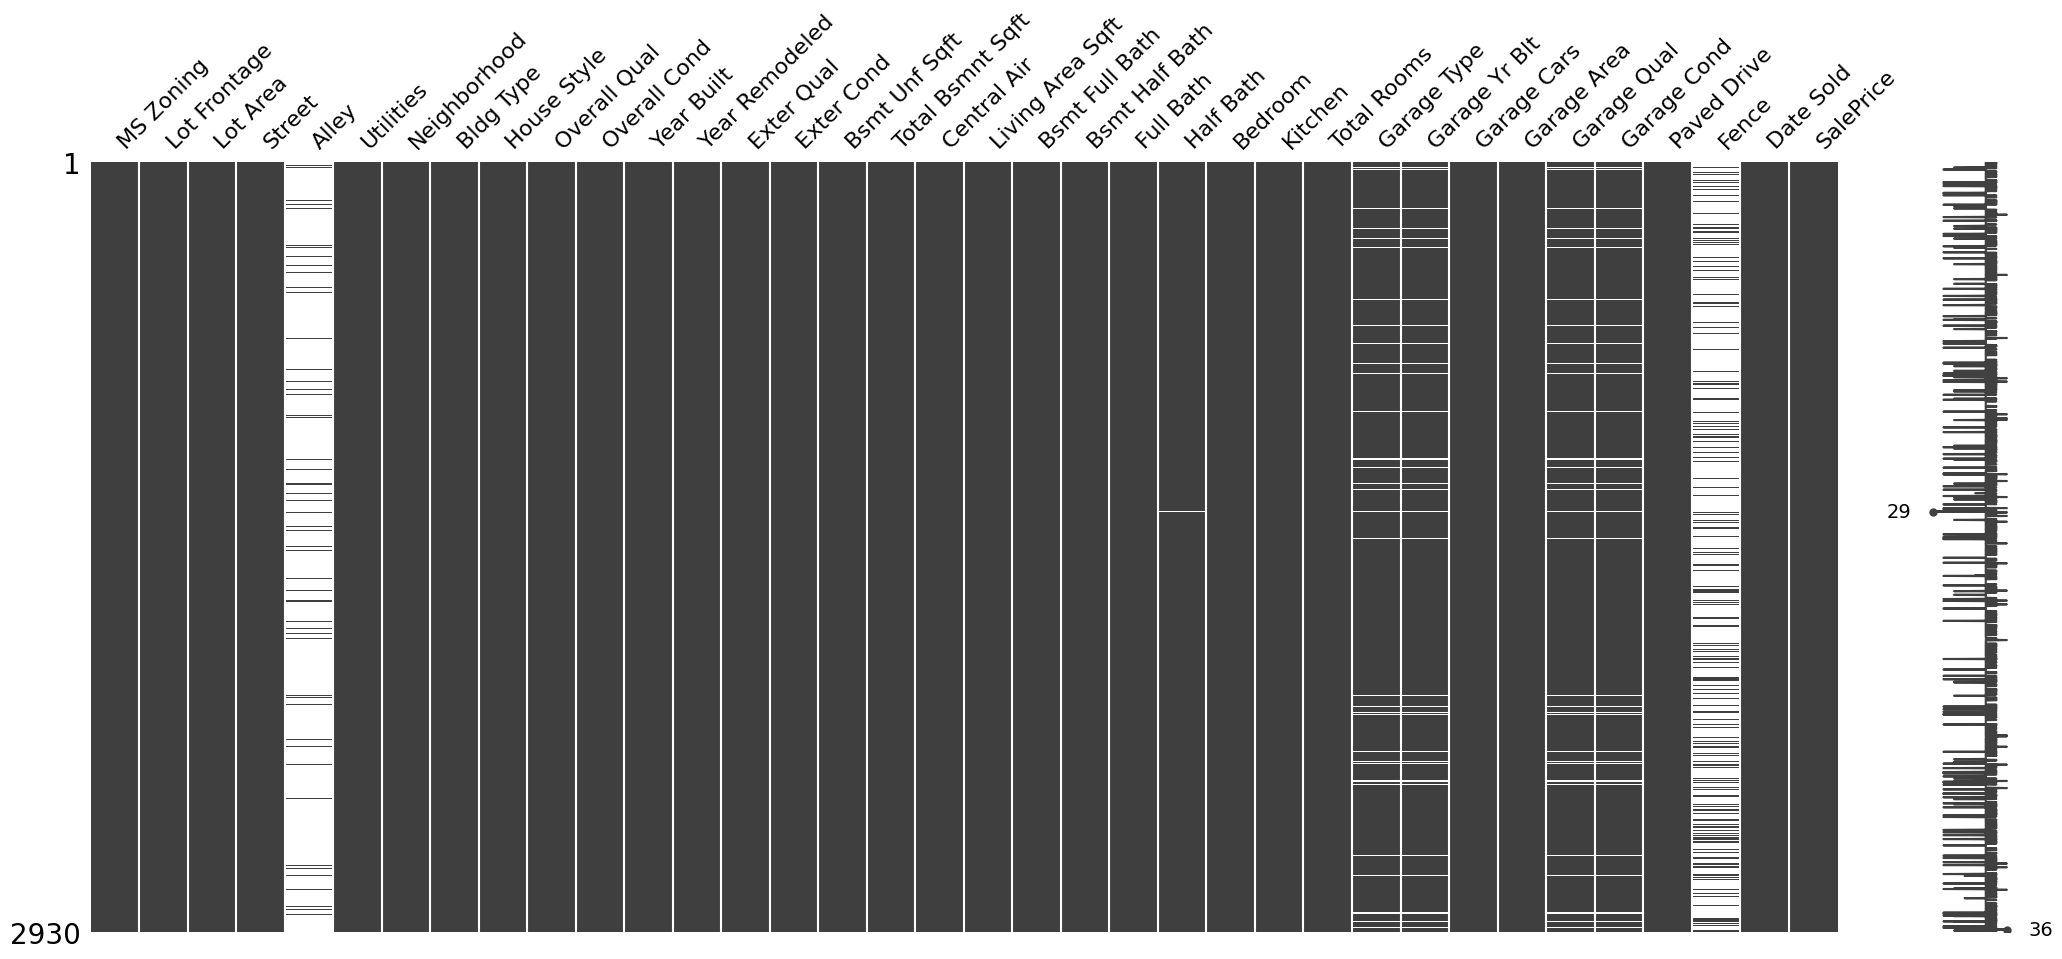

In [28]:
# Visualizing Missing Values with missingno
msno.matrix(df)

- In the missingno matrix plot, we can see that there are only a few columns that have missing values. Of these columns, 2 seem to have primarily null values ("Alley" and "Fence"). 

- Below, we will display the null value counts and percentages for only the column with null values:

In [29]:
## filtering for only columns with null values
null_report[ null_report['# Null']>0]

# Null  % Null
Alley               2732   93.24
Bsmt Unf Sqft          1    0.03
Total Bsmnt Sqft       1    0.03
Bsmt Full Bath         2    0.07
Bsmt Half Bath         2    0.07
Half Bath              3    0.10
Garage Type          157    5.36
Garage Yr Blt        159    5.43
Garage Cars            1    0.03
Garage Area            1    0.03
Garage Qual          159    5.43
Garage Cond          159    5.43
Fence               2358   80.48

#### Null Value Observations:
- Alley and Fence have a large percentage of null values (93% and 80%, respectively).
- For Garage Columns (Garage Type, Garage Yr Built, Garage Qual, Garage Cond), the same rows are null values for all of these columns.
  - This likely indicates that these homes did not have a Garage.



### Are there any features with inconsistent values?


#### Checking Categorical Features for Inconsistencies

In [30]:
# Identify string columns
cat_cols = df.select_dtypes("object").columns
cat_cols

Index(['MS Zoning', 'Street', 'Alley', 'Utilities', 'Neighborhood',
       'Bldg Type', 'House Style', 'Exter Qual', 'Exter Cond', 'Central Air',
       'Garage Type', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Fence',
       'Date Sold'],
      dtype='object')

In [31]:
# Obtain the value counts for all string columns
for col in cat_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts(dropna=False))
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for MS Zoning
RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64


Value Counts for Street
Pave    2918
Grvl      12
Name: Street, dtype: int64


Value Counts for Alley
NaN     2732
Grvl     120
Pave      78
Name: Alley, dtype: int64


Value Counts for Utilities
AllPub    2927
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64


Value Counts for Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64


Value Counts for Bldg Type
1Fam      2425
TwnhsE     233
Duplex     109

##### Notes on Categorical Feature Inconsistencies

- **Central Air**: 
  - There were a small number of values in the Central Air column that had "yes" instead of "Y" and "no" instead of "N."
  - [ ] We will replace the incorrect values with "Y" and "N."

- **Date Sold**: 
  - Is not inconsistent, but would be better used separate month and year features.
  - We will separate into 2 features after checking remaining columns for inconsistencies.


##### Fixing "Central Air" inconsistencies

In [32]:
# deal with inconsistent values
df['Central Air'] = df['Central Air'].replace({'yes':"Y",'no':'N'})
df['Central Air'].value_counts(dropna=False)

Y    2734
N     196
Name: Central Air, dtype: int64

#### ✨ Checking Numeric Features for Consistency 

In [33]:
df.describe().round(2)

Lot Frontage   Lot Area  Overall Qual  Overall Cond  Year Built  \
count       2930.00    2930.00       2930.00       2930.00     2930.00   
mean          57.48   10147.92          6.09          5.56     1971.36   
std           33.79    7880.02          1.41          1.11       30.25   
min           -1.00    1300.00          1.00          1.00     1872.00   
25%           43.00    7440.25          5.00          5.00     1954.00   
50%           63.00    9436.50          6.00          5.00     1973.00   
75%           78.00   11555.25          7.00          6.00     2001.00   
max          313.00  215245.00         10.00          9.00     2010.00   

       Year Remodeled  Bsmt Unf Sqft  Total Bsmnt Sqft  Living Area Sqft  \
count         2930.00        2929.00           2929.00           2930.00   
mean          1984.27         559.26           1051.61           1499.69   
std             20.86         439.49            440.62            505.51   
min           1950.00           0.00              0.00            334.00   
25%           1965.00         219.00            793.00           1126.00   
50%           1993.00         466.00            990.00           1442.00   
75%           2004.00         802.00           1302.00           1742.75   
max           2010.00        2336.00           6110.00           5642.00   

       Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom  Kitchen  \
count         2928.00         2928.00    2930.00    2927.00  2930.00  2930.00   
mean             0.43            0.06       1.57       0.38     2.85     1.04   
std              0.52            0.25       0.55       0.50     0.83     0.21   
min              0.00            0.00       0.00       0.00     0.00     0.00   
25%              0.00            0.00       1.00       0.00     2.00     1.00   
50%              0.00            0.00       2.00       0.00     3.00     1.00   
75%              1.00            0.00       2.00       1.00     3.00     1.00   
max              3.00            2.00       4.00       2.00     8.00     3.00   

       Total Rooms  Garage Yr Blt  Garage Cars  Garage Area   SalePrice  
count      2930.00        2771.00      2929.00      2929.00     2930.00  
mean          6.44        1978.13         1.77       472.82   181439.40  
std           1.57          25.53         0.76       215.05    86659.68  
min           2.00        1895.00         0.00         0.00    12789.00  
25%           5.00        1960.00         1.00       320.00   129500.00  
50%           6.00        1979.00         2.00       480.00   160000.00  
75%           7.00        2002.00         2.00       576.00   213500.00  
max          15.00        2207.00         5.00      1488.00  2000000.00

##### **Notes on Numeric Feature Inconsistencies**

- **Lot Frontage**: has a minimum value of -1. 
  - This may be a placeholder value.
  - [ ] We should consider replace the -1's with either NaN or 0, which we will decide after visualizing the features.

- **SalePrice**: The max value is much higher than the 75 percentile (\$2 million vs. \$213,500). 
  - [ ] We should inspect this home and confirm it is reasonable.


- **Garage Yr Built**: has a max value of 2207, which is in many years into the future, and cannot be correct.
  - [ ] Replace with a null value

##### Addressing Lot Frontage Inconsistencies

In [34]:
## How many rows with Lot Frontage -1's 
filter_neg_lot_frontage = df['Lot Frontage'] < 0
filter_neg_lot_frontage.sum()

490

In [35]:
##  Replacing negative lot frontages with null values
df.loc[filter_neg_lot_frontage,'Lot Frontage'] = np.nan

## Confirming no longer rows with Lot Frontage < 0 
filter_neg_lot_frontage = df['Lot Frontage'] < 0
filter_neg_lot_frontage.sum()

0

In [36]:
df["Lot Frontage"].describe()

count    2440.000000
mean       69.224590
std        23.365335
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

#####  Addressing Sale Price Inconsistencies

In [37]:
# Visualze expensive home (SalePrice >= 2 million)
filter_high_price = df['SalePrice'] >= 2_000_000
df[filter_high_price]

MS Zoning  Lot Frontage  Lot Area Street Alley Utilities  \
PID                                                                  
902201120        RM          50.0      6000   Pave   NaN    AllPub   

          Neighborhood Bldg Type House Style  Overall Qual  Overall Cond  \
PID                                                                        
902201120      OldTown      1Fam      1Story             5             5   

           Year Built  Year Remodeled Exter Qual Exter Cond  Bsmt Unf Sqft  \
PID                                                                          
902201120        1948            1950         TA         TA          516.0   

           Total Bsmnt Sqft Central Air  Living Area Sqft  Bsmt Full Bath  \
PID                                                                         
902201120             789.0           Y             789.0             0.0   

           Bsmt Half Bath  Full Bath  Half Bath  Bedroom  Kitchen  \
PID                                                                 
902201120             0.0          1        0.0        2        1   

           Total Rooms Garage Type  Garage Yr Blt  Garage Cars  Garage Area  \
PID                                                                           
902201120            5      Detchd         1948.0          1.0        250.0   

          Garage Qual Garage Cond Paved Drive Fence Date Sold  SalePrice  
PID                                                                       
902201120          TA          TA           Y   NaN   04-2008  2000000.0

In [38]:
## Checking 5 highest prices to compare against outlier $2 million
df.sort_values("SalePrice", ascending=False).head()

MS Zoning  Lot Frontage  Lot Area Street Alley Utilities  \
PID                                                                  
902201120        RM          50.0      6000   Pave   NaN    AllPub   
528351010        RL         104.0     21535   Pave   NaN    AllPub   
528320050        RL         160.0     15623   Pave   NaN    AllPub   
528320060        RL         118.0     35760   Pave   NaN    AllPub   
528164060        RL         106.0     12720   Pave   NaN    AllPub   

          Neighborhood Bldg Type House Style  Overall Qual  Overall Cond  \
PID                                                                        
902201120      OldTown      1Fam      1Story             5             5   
528351010      NoRidge      1Fam      2Story            10             6   
528320050      NoRidge      1Fam      2Story            10             5   
528320060      NoRidge      1Fam      2Story            10             5   
528164060      NridgHt      1Fam      1Story            10             5   

           Year Built  Year Remodeled Exter Qual Exter Cond  Bsmt Unf Sqft  \
PID                                                                          
902201120        1948            1950         TA         TA          516.0   
528351010        1994            1995         Ex         TA          989.0   
528320050        1996            1996         Gd         TA          300.0   
528320060        1995            1996         Gd         Gd          543.0   
528164060        2003            2003         Ex         TA          278.0   

           Total Bsmnt Sqft Central Air  Living Area Sqft  Bsmt Full Bath  \
PID                                                                         
902201120             789.0           Y             789.0             0.0   
528351010            2444.0           Y            4316.0             0.0   
528320050            2396.0           Y            4476.0             1.0   
528320060            1930.0           Y            3627.0             1.0   
528164060            2535.0           Y            2470.0             2.0   

           Bsmt Half Bath  Full Bath  Half Bath  Bedroom  Kitchen  \
PID                                                                 
902201120             0.0          1        0.0        2        1   
528351010             1.0          3        1.0        4        1   
528320050             0.0          3        1.0        4        1   
528320060             0.0          3        1.0        4        1   
528164060             0.0          1        1.0        1        1   

           Total Rooms Garage Type  Garage Yr Blt  Garage Cars  Garage Area  \
PID                                                                           
902201120            5      Detchd         1948.0          1.0        250.0   
528351010           10      Attchd         1994.0          3.0        832.0   
528320050           10      Attchd         1996.0          3.0        813.0   
528320060           10      Attchd         1995.0          3.0        807.0   
528164060            7      Attchd         2003.0          3.0        789.0   

          Garage Qual Garage Cond Paved Drive  Fence Date Sold  SalePrice  
PID                                                                        
902201120          TA          TA           Y    NaN   04-2008  2000000.0  
528351010          TA          TA           Y    NaN   01-2007   755000.0  
528320050          TA          TA           Y  MnPrv   07-2007   745000.0  
528320060          TA          TA           Y    NaN   07-2006   625000.0  
528164060          TA          TA           Y    NaN   02-2008   615000.0

- The Living Area Sqft for the \$2mill home is very small compared to the other most-expensive homes. 
789 sqft vs. 2,400 sqft (with a price of \$755,000).

- This value is not realistic, and should either be dropped or replaced with \$200,000. the \$2 million could be a typo with an extra 0.




In [39]:
df.loc[filter_high_price,'SalePrice'] = 200_000
df['SalePrice'].describe()

count      2930.000000
mean     180825.070307
std       79878.223965
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

##### Addressing Garage Yr Blt Inconsistencies

In [40]:
## Filter for row with Garage Yr Blt = 2207
filter_typo_garage_year = df['Garage Yr Blt'] == 2207
filter_typo_garage_year

PID
907227090    False
527108010    False
534275170    False
528104050    False
533206070    False
             ...  
903400030    False
533234020    False
908188140    False
909254050    False
902201120    False
Name: Garage Yr Blt, Length: 2930, dtype: bool

In [41]:
df.loc[filter_typo_garage_year,'Garage Yr Blt'] = np.nan
df['Garage Yr Blt'].describe()

count    2770.000000
mean     1978.049819
std        25.159722
min      1895.000000
25%      1960.000000
50%      1979.000000
75%      2002.000000
max      2010.000000
Name: Garage Yr Blt, dtype: float64


### Do any features need to be combined or separated?



- [ ] There is a Date Sold column that we will split into 2: Month and Year


#### Splitting "Date Sold" into "Month" and "Year"

In [42]:
## Split Date Sold in Month and Year
df[['Month','Year']] = df.loc[:,'Date Sold'].str.split('-', expand=True)
df.head()

MS Zoning  Lot Frontage  Lot Area Street Alley Utilities  \
PID                                                                  
907227090        RL          60.0      7200   Pave   NaN    AllPub   
527108010        RL         134.0     19378   Pave   NaN    AllPub   
534275170        RL           NaN     12772   Pave   NaN    AllPub   
528104050        RL         114.0     14803   Pave   NaN    AllPub   
533206070        FV          32.0      3784   Pave  Pave    AllPub   

          Neighborhood Bldg Type House Style  Overall Qual  Overall Cond  \
PID                                                                        
907227090      CollgCr      1Fam      1Story             5             8   
527108010      Gilbert      1Fam      2Story             7             5   
534275170        NAmes      1Fam      1Story             6             8   
528104050      NridgHt      1Fam      1Story            10             5   
533206070      Somerst    TwnhsE      1Story             8             5   

           Year Built  Year Remodeled Exter Qual Exter Cond  Bsmt Unf Sqft  \
PID                                                                          
907227090        1972            1972         TA         TA          427.0   
527108010        2005            2006         Gd         TA         1335.0   
534275170        1960            1998         TA         Gd          460.0   
528104050        2007            2008         Ex         TA          442.0   
533206070        2006            2007         Gd         TA         1451.0   

           Total Bsmnt Sqft Central Air  Living Area Sqft  Bsmt Full Bath  \
PID                                                                         
907227090             864.0           Y             864.0             0.0   
527108010            1392.0           Y            2462.0             1.0   
534275170             958.0           Y             958.0             0.0   
528104050            2078.0           Y            2084.0             1.0   
533206070            1511.0           Y            1565.0             1.0   

           Bsmt Half Bath  Full Bath  Half Bath  Bedroom  Kitchen  \
PID                                                                 
907227090             0.0          1        0.0        3        1   
527108010             0.0          2        1.0        4        1   
534275170             0.0          1        0.0        2        1   
528104050             0.0          2        0.0        2        1   
533206070             0.0          2        0.0        2        1   

           Total Rooms Garage Type  Garage Yr Blt  Garage Cars  Garage Area  \
PID                                                                           
907227090            5      Detchd         1977.0          1.0        297.0   
527108010            9      Attchd         2006.0          2.0        576.0   
534275170            5      Attchd         1960.0          1.0        301.0   
528104050            7      Attchd         2007.0          3.0       1220.0   
533206070            5      Attchd         2006.0          2.0        476.0   

          Garage Qual Garage Cond Paved Drive  Fence Date Sold  SalePrice  \
PID                                                                         
907227090          TA          TA           Y  MnPrv   03-2006   119900.0   
527108010          TA          TA           Y    NaN   03-2006   320000.0   
534275170          TA          TA           Y    NaN   04-2007   151500.0   
528104050          TA          TA           Y    NaN   06-2008   385000.0   
533206070          TA          TA           Y    NaN   02-2007   193800.0   

          Month  Year  
PID                    
907227090    03  2006  
527108010    03  2006  
534275170    04  2007  
528104050    06  2008  
533206070    02  2007

In [43]:
# Dropping original date sold column
df = df.drop(columns=['Date Sold'])

#### Add "Bsmt Half Baths" + "Half Baths" to make "Total Half Baths"

In [44]:
# Preview first 5 values
df['Full Bath'].head()

PID
907227090    1
527108010    2
534275170    1
528104050    2
533206070    2
Name: Full Bath, dtype: int64

In [45]:
# Preview first 5 values
df['Bsmt Full Bath'].head()

PID
907227090    0.0
527108010    1.0
534275170    0.0
528104050    1.0
533206070    1.0
Name: Bsmt Full Bath, dtype: float64

In [46]:
# Add values from two columns to create a new column
df['Total Full Baths'] = df['Full Bath'] + df['Bsmt Full Bath']
df['Total Full Baths'].head()

PID
907227090    1.0
527108010    3.0
534275170    1.0
528104050    3.0
533206070    3.0
Name: Total Full Baths, dtype: float64

In [47]:
# Drop the original columns
df = df.drop(columns=['Full Bath', 'Bsmt Full Bath'])
df.head()

MS Zoning  Lot Frontage  Lot Area Street Alley Utilities  \
PID                                                                  
907227090        RL          60.0      7200   Pave   NaN    AllPub   
527108010        RL         134.0     19378   Pave   NaN    AllPub   
534275170        RL           NaN     12772   Pave   NaN    AllPub   
528104050        RL         114.0     14803   Pave   NaN    AllPub   
533206070        FV          32.0      3784   Pave  Pave    AllPub   

          Neighborhood Bldg Type House Style  Overall Qual  Overall Cond  \
PID                                                                        
907227090      CollgCr      1Fam      1Story             5             8   
527108010      Gilbert      1Fam      2Story             7             5   
534275170        NAmes      1Fam      1Story             6             8   
528104050      NridgHt      1Fam      1Story            10             5   
533206070      Somerst    TwnhsE      1Story             8             5   

           Year Built  Year Remodeled Exter Qual Exter Cond  Bsmt Unf Sqft  \
PID                                                                          
907227090        1972            1972         TA         TA          427.0   
527108010        2005            2006         Gd         TA         1335.0   
534275170        1960            1998         TA         Gd          460.0   
528104050        2007            2008         Ex         TA          442.0   
533206070        2006            2007         Gd         TA         1451.0   

           Total Bsmnt Sqft Central Air  Living Area Sqft  Bsmt Half Bath  \
PID                                                                         
907227090             864.0           Y             864.0             0.0   
527108010            1392.0           Y            2462.0             0.0   
534275170             958.0           Y             958.0             0.0   
528104050            2078.0           Y            2084.0             0.0   
533206070            1511.0           Y            1565.0             0.0   

           Half Bath  Bedroom  Kitchen  Total Rooms Garage Type  \
PID                                                               
907227090        0.0        3        1            5      Detchd   
527108010        1.0        4        1            9      Attchd   
534275170        0.0        2        1            5      Attchd   
528104050        0.0        2        1            7      Attchd   
533206070        0.0        2        1            5      Attchd   

           Garage Yr Blt  Garage Cars  Garage Area Garage Qual Garage Cond  \
PID                                                                          
907227090         1977.0          1.0        297.0          TA          TA   
527108010         2006.0          2.0        576.0          TA          TA   
534275170         1960.0          1.0        301.0          TA          TA   
528104050         2007.0          3.0       1220.0          TA          TA   
533206070         2006.0          2.0        476.0          TA          TA   

          Paved Drive  Fence  SalePrice Month  Year  Total Full Baths  
PID                                                                    
907227090           Y  MnPrv   119900.0    03  2006               1.0  
527108010           Y    NaN   320000.0    03  2006               3.0  
534275170           Y    NaN   151500.0    04  2007               1.0  
528104050           Y    NaN   385000.0    06  2008               3.0  
533206070           Y    NaN   193800.0    02  2007               3.0

#### Combine "Bsmt Half Baths" + "Half Baths"

In [48]:
# Inspect first 5 rows
df['Half Bath'].value_counts(dropna=False)

0.0    1841
1.0    1061
2.0      25
NaN       3
Name: Half Bath, dtype: int64

In [49]:
# Inspect first 5 rows
df['Bsmt Half Bath'].value_counts()

0.0    2753
1.0     171
2.0       4
Name: Bsmt Half Bath, dtype: int64

In [50]:
# Add values from two columns to create a new column
df['Total Half Baths'] = df['Half Bath'] + df['Bsmt Half Bath']
df['Total Half Baths'].value_counts()

0.0    1706
1.0    1154
2.0      61
3.0       3
4.0       1
Name: Total Half Baths, dtype: int64

In [51]:
# Drop the original columns
df = df.drop(columns=['Half Bath', 'Bsmt Half Bath'])
df.head()

MS Zoning  Lot Frontage  Lot Area Street Alley Utilities  \
PID                                                                  
907227090        RL          60.0      7200   Pave   NaN    AllPub   
527108010        RL         134.0     19378   Pave   NaN    AllPub   
534275170        RL           NaN     12772   Pave   NaN    AllPub   
528104050        RL         114.0     14803   Pave   NaN    AllPub   
533206070        FV          32.0      3784   Pave  Pave    AllPub   

          Neighborhood Bldg Type House Style  Overall Qual  Overall Cond  \
PID                                                                        
907227090      CollgCr      1Fam      1Story             5             8   
527108010      Gilbert      1Fam      2Story             7             5   
534275170        NAmes      1Fam      1Story             6             8   
528104050      NridgHt      1Fam      1Story            10             5   
533206070      Somerst    TwnhsE      1Story             8             5   

           Year Built  Year Remodeled Exter Qual Exter Cond  Bsmt Unf Sqft  \
PID                                                                          
907227090        1972            1972         TA         TA          427.0   
527108010        2005            2006         Gd         TA         1335.0   
534275170        1960            1998         TA         Gd          460.0   
528104050        2007            2008         Ex         TA          442.0   
533206070        2006            2007         Gd         TA         1451.0   

           Total Bsmnt Sqft Central Air  Living Area Sqft  Bedroom  Kitchen  \
PID                                                                           
907227090             864.0           Y             864.0        3        1   
527108010            1392.0           Y            2462.0        4        1   
534275170             958.0           Y             958.0        2        1   
528104050            2078.0           Y            2084.0        2        1   
533206070            1511.0           Y            1565.0        2        1   

           Total Rooms Garage Type  Garage Yr Blt  Garage Cars  Garage Area  \
PID                                                                           
907227090            5      Detchd         1977.0          1.0        297.0   
527108010            9      Attchd         2006.0          2.0        576.0   
534275170            5      Attchd         1960.0          1.0        301.0   
528104050            7      Attchd         2007.0          3.0       1220.0   
533206070            5      Attchd         2006.0          2.0        476.0   

          Garage Qual Garage Cond Paved Drive  Fence  SalePrice Month  Year  \
PID                                                                           
907227090          TA          TA           Y  MnPrv   119900.0    03  2006   
527108010          TA          TA           Y    NaN   320000.0    03  2006   
534275170          TA          TA           Y    NaN   151500.0    04  2007   
528104050          TA          TA           Y    NaN   385000.0    06  2008   
533206070          TA          TA           Y    NaN   193800.0    02  2007   

           Total Full Baths  Total Half Baths  
PID                                            
907227090               1.0               0.0  
527108010               3.0               1.0  
534275170               1.0               0.0  
528104050               3.0               0.0  
533206070               3.0               0.0

### Save MVP Cleaning

Now that we have finished our minimal viable product (MVP) version of data cleaning for exploratory analysis, we should save the dataframe as a new csv that indicates the data has been cleaned. 

Since the PID column is our index, we will want to keep the index when we save the data to our drive.

In [52]:
# Saving the final dataframe to Google Drive
fpath_out = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week05/Data/ames-housing-dojo-for-ml.csv"
df.to_csv(fpath_out, index=True)

In [53]:
# Testing saved file
loaded = pd.read_csv(fpath_out)
loaded

PID MS Zoning  Lot Frontage  Lot Area Street Alley Utilities  \
0     907227090        RL          60.0      7200   Pave   NaN    AllPub   
1     527108010        RL         134.0     19378   Pave   NaN    AllPub   
2     534275170        RL           NaN     12772   Pave   NaN    AllPub   
3     528104050        RL         114.0     14803   Pave   NaN    AllPub   
4     533206070        FV          32.0      3784   Pave  Pave    AllPub   
...         ...       ...           ...       ...    ...   ...       ...   
2925  903400030        RL          50.0     11672   Pave  Pave    AllPub   
2926  533234020        FV          79.0     10646   Pave   NaN    AllPub   
2927  908188140        RM          24.0      2522   Pave   NaN    AllPub   
2928  909254050        RL          54.0      7609   Pave   NaN    AllPub   
2929  902201120        RM          50.0      6000   Pave   NaN    AllPub   

     Neighborhood Bldg Type House Style  Overall Qual  Overall Cond  \
0         CollgCr      1Fam      1Story             5             8   
1         Gilbert      1Fam      2Story             7             5   
2           NAmes      1Fam      1Story             6             8   
3         NridgHt      1Fam      1Story            10             5   
4         Somerst    TwnhsE      1Story             8             5   
...           ...       ...         ...           ...           ...   
2925      BrkSide      1Fam      1Story             5             5   
2926      Somerst      1Fam      2Story             7             5   
2927      Edwards     Twnhs      2Story             7             5   
2928      Crawfor      1Fam      2Story             8             9   
2929      OldTown      1Fam      1Story             5             5   

      Year Built  Year Remodeled Exter Qual Exter Cond  Bsmt Unf Sqft  \
0           1972            1972         TA         TA          427.0   
1           2005            2006         Gd         TA         1335.0   
2           1960            1998         TA         Gd          460.0   
3           2007            2008         Ex         TA          442.0   
4           2006            2007         Gd         TA         1451.0   
...          ...             ...        ...        ...            ...   
2925        1925            1950         TA         TA          816.0   
2926        2001            2001         TA         TA          177.0   
2927        2004            2004         Gd         TA          970.0   
2928        1925            1997         Gd         Gd          392.0   
2929        1948            1950         TA         TA          516.0   

      Total Bsmnt Sqft Central Air  Living Area Sqft  Bedroom  Kitchen  \
0                864.0           Y             864.0        3        1   
1               1392.0           Y            2462.0        4        1   
2                958.0           Y             958.0        2        1   
3               2078.0           Y            2084.0        2        1   
4               1511.0           Y            1565.0        2        1   
...                ...         ...               ...      ...      ...   
2925             816.0           Y             816.0        2        1   
2926             858.0           Y            1789.0        3        1   
2927             970.0           Y            1709.0        3        1   
2928             798.0           Y            1512.0        3        1   
2929             789.0           Y             789.0        2        1   

      Total Rooms Garage Type  Garage Yr Blt  Garage Cars  Garage Area  \
0               5      Detchd         1977.0          1.0        297.0   
1               9      Attchd         2006.0          2.0        576.0   
2               5      Attchd         1960.0          1.0        301.0   
3               7      Attchd         2007.0          3.0       1220.0   
4               5      Attchd         2006.0          2.0        476.0   
...           ...         ...       

## Part 2: Exploratory Data Analysis
- Phase 2.4 of CRISP-DM: Explore Each Feature

In [54]:
# Import modeling tools # Note: Move to top of final example notebook
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

## 2.4) What do the features look like and how are they related?</b></p>




<p>What do the features look like and how are they related? Explore Data</p>
<ul><li>I. Dig deeper into the data and further explore and visualize each feature.</li><li>II. Visualize the features and identify relationships between them.</li></ul>



### Define EDA Functions

In [55]:
# def explore_categorical_check_constant(df, x, fillna = True, placeholder = 'MISSING',
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """BEST VERSION"""
  # Make a copy of the dataframe and fillna 
  temp_df = df.copy()


  ## Save null value counts and percent for printing 
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100


  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)


  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)

  ## Plotting a count plot 
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)

  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add. atitle with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')
  
  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()
  
    
  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = temp_df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]

  perc_most_common = freq / len(temp_df) * 100
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")

  return fig, ax

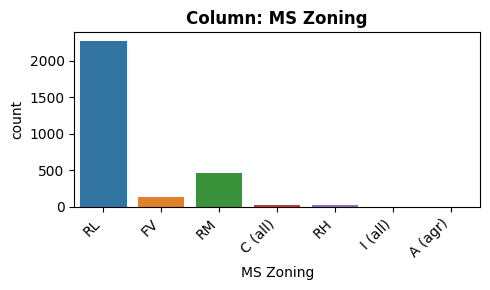

- NaN's Found: 0 (0.0%)
- Unique Values: 7
- Most common value: 'RL' occurs 2273 times (77.58%)


In [56]:
# Testing function
fig, ax = explore_categorical(df, "MS Zoning", figsize=(5,3))

In [57]:

def plot_categorical_vs_target(df, x, y='SalePrice',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna 
  temp_df = df.copy()
  # # Save null values before imputing
  # null_count = temp_df[x].isna().sum()
  # null_perc = null_count/len(df)* 100

  ## fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  
  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x]) 


  ## Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)
  
    # Barplot 
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)
  
  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax, 
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)

  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  
  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()

  # show fig and print
  plt.show()
  # print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

  return fig, ax

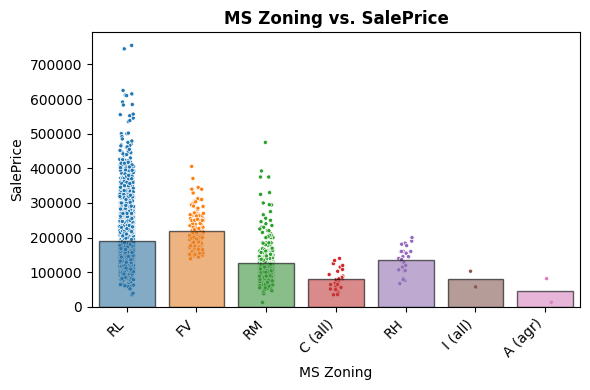

In [58]:
# Testing function
fig, ax = plot_categorical_vs_target(df, "MS Zoning")

In [59]:
# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):

  ## Save null value counts and percent for printing 
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()
  
  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100
  
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  
  return fig, axes

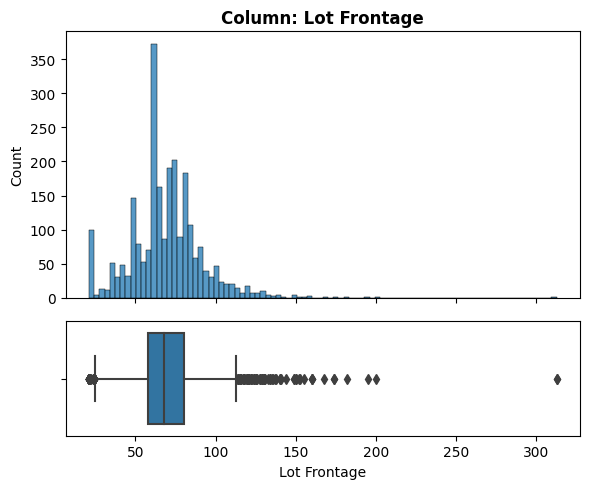

- NaN's Found: 490 (16.72%)
- Unique Values: 128
- Most common value: 'nan' occurs 490 times (16.72%)


In [60]:
# Testing the function
explore_numeric(df, "Lot Frontage");

In [61]:
def plot_numeric_vs_target(df, x, y='SalePrice',
                           figsize=(6,4), 
                           ):
  
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  if null_count > 0:
    null_perc = null_count/len(df)* 100
    print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  
  return fig, ax

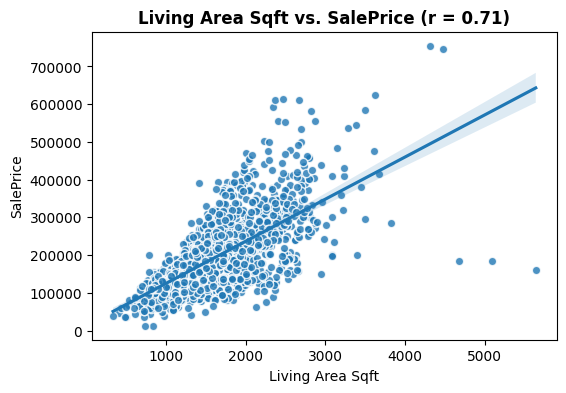

In [62]:
fig, ax = plot_numeric_vs_target(df, "Living Area Sqft")

- NaN's Found: 490 (16.72%)


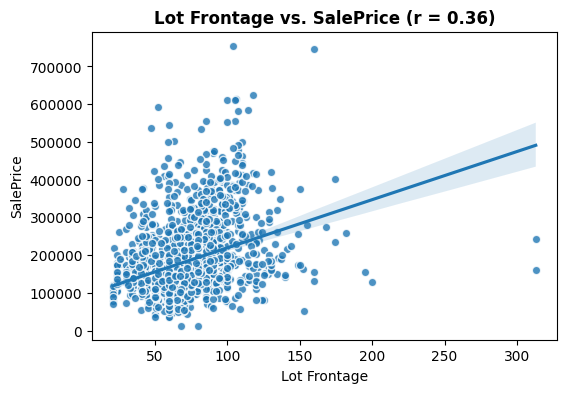

In [63]:
# Testing funcion on col with nulls
fig, ax = plot_numeric_vs_target(df, "Lot Frontage")

### Visualizing Each Feature

In [64]:
## get list of object cols
cat_cols = df.select_dtypes("object").columns
cat_cols

Index(['MS Zoning', 'Street', 'Alley', 'Utilities', 'Neighborhood',
       'Bldg Type', 'House Style', 'Exter Qual', 'Exter Cond', 'Central Air',
       'Garage Type', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Fence',
       'Month', 'Year'],
      dtype='object')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 907227090 to 902201120
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MS Zoning         2930 non-null   object 
 1   Lot Frontage      2440 non-null   float64
 2   Lot Area          2930 non-null   int64  
 3   Street            2930 non-null   object 
 4   Alley             198 non-null    object 
 5   Utilities         2930 non-null   object 
 6   Neighborhood      2930 non-null   object 
 7   Bldg Type         2930 non-null   object 
 8   House Style       2930 non-null   object 
 9   Overall Qual      2930 non-null   int64  
 10  Overall Cond      2930 non-null   int64  
 11  Year Built        2930 non-null   int64  
 12  Year Remodeled    2930 non-null   int64  
 13  Exter Qual        2930 non-null   object 
 14  Exter Cond        2930 non-null   object 
 15  Bsmt Unf Sqft     2929 non-null   float64
 16  Total Bsmnt Sqft  2929 non-nu

### Inspecting Each Feature

#### MS Zoning


- "MSZoning": Identifies the general zoning classification of the sale:
  - A: Agriculture
  - C: Commercial
  - FV: Floating Village Residential
  - I: Industrial
  - RH: Residential High Density
  - RL: Residential Low Density
  - RP: Residential Low Density Park
  - RM: Residential Medium Density


In [66]:
# Confirming the dtype to select correct EDA function
feature = "MS Zoning"
df[feature].dtype

dtype('O')

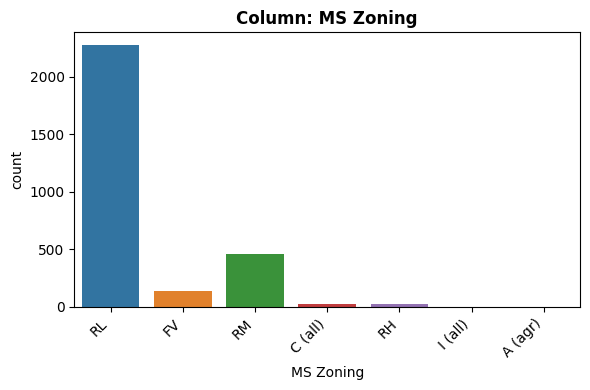

- NaN's Found: 0 (0.0%)
- Unique Values: 7
- Most common value: 'RL' occurs 2273 times (77.58%)


In [67]:
explore_categorical(df, feature);

Observations

1. What type of feature is it? (Nominal category, ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values. 
  - No need to impute.

3. Is the feature constant or quasi-constant?
  - No, the most common category makes up only 77% of the feature.

4. What is the cardinality? Is it high?
  - There are 7 categories. Not high cardinality ( < 10 categories)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - If we are focusing on improving home value with renovations, then this feature would not be under the homeowner's control. 
  - We may not want to use it, but if we do, we cannot make actionable recommendations with it.


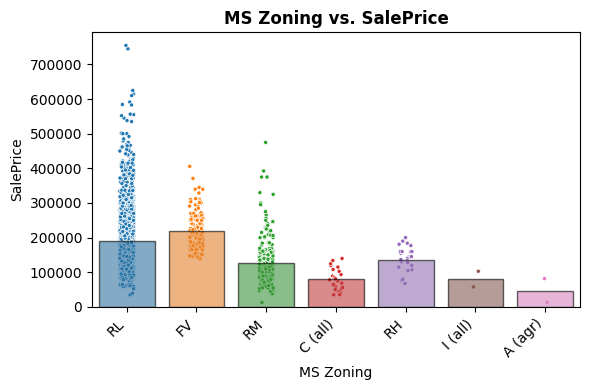

In [68]:
plot_categorical_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, the housing zone would change the nature of the buildings in the same neighborhood, which may increase/decrease the appeal of a home.
  - Does this feature appear to be a predictor of the target?
    - Yes.


#### Lot Frontage



- "LotFrontage": Linear feet of street connected to property

In [69]:
# Confirming the dtype to select correct EDA function
feature = "Lot Frontage"
df[feature].dtype

dtype('float64')

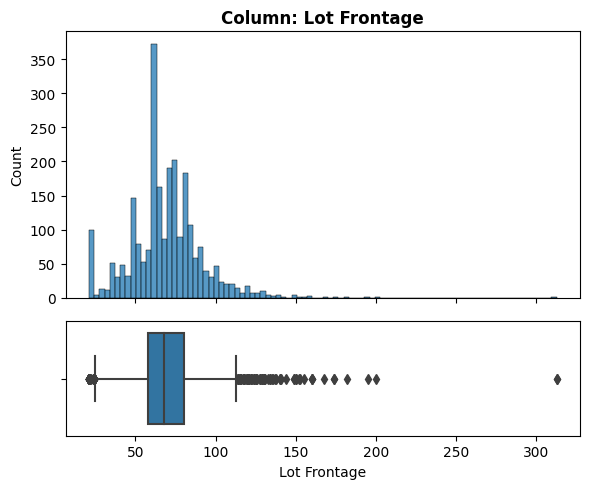

- NaN's Found: 490 (16.72%)
- Unique Values: 128
- Most common value: 'nan' occurs 490 times (16.72%)


In [70]:
fig, axes = explore_numeric(df, feature)


**Observations:**

1. What type of feature is it? (categorical (nominal), ordinal, numeric?)
  - Numeric.

2. How many null values? What percentage? What will you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 490 nul values (16.7%)
  - NaN may represent property lot is not connected to street.
    - Impute with a constant value of 0.
    - Note: could investigate other Lot columns for null values to inform if the NaN is meaningful.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Numeric feature, so not a concern.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - Feature is likely beyond homeowner's control, but may be helpful in predicting Sale Price.


- NaN's Found: 490 (16.72%)


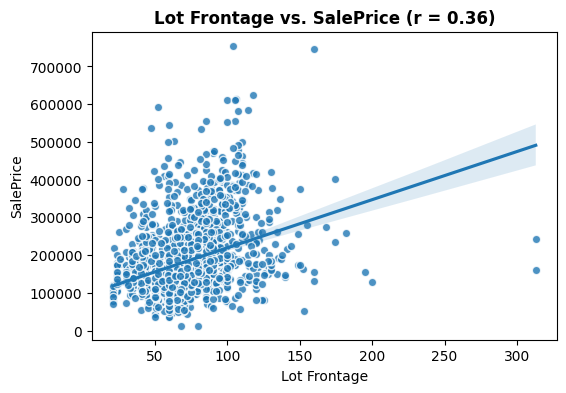

In [71]:
fig, axes = plot_numeric_vs_target(df, feature)

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes, but there are some outleirs that may be affecting the overall trendline.


#### Lot Area


- "LotArea": Lot size in square feet

In [72]:
# Confirming the dtype to select correct EDA function
feature = "Lot Area"
df[feature].dtype

dtype('int64')

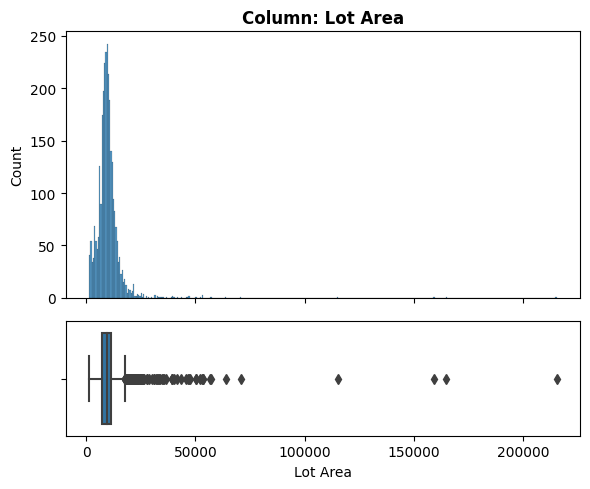

- NaN's Found: 0 (0.0%)
- Unique Values: 1960
- Most common value: '9600' occurs 44 times (1.5%)


In [73]:
explore_numeric(df, feature);


**Observations:**

1. What type of feature is it? (categorical (nominal), ordinal, numeric?)
  - Numeric (int)

2. How many null values? What percentage? What will you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not a categorical feature. 

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - Lot size is likely outside of the homeowners control. 

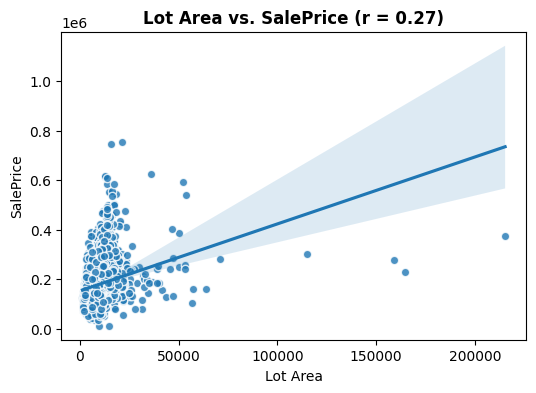

In [74]:
plot_numeric_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Possibly. The trendline is difficult to discern with the few outliers for Lot Area.


#### Street


- "Street": Type of road access to property
  - Grvl: Gravel
  - Pave: Paved


In [75]:
# Confirming the dtype to select correct EDA function
feature = "Street"
df[feature].dtype

dtype('O')

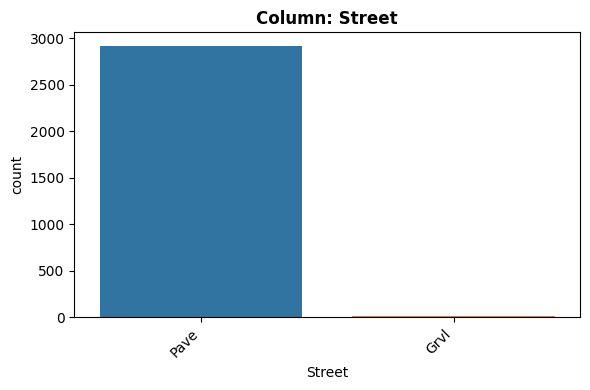

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Pave' occurs 2918 times (99.59%)

- [!] Warning: 'Street' is a constant or quasi-constant feature and should be dropped.


In [76]:
explore_categorical(df, feature);


**Observations:**


1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.

3. Is the feature constant or quasi-constant?
  - quasi-constant. > 99% of values are "Pave"

4. What is the cardinality? Is it high?
  - Low, only 2.

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - Very unlikely that the homeowner could change if their street is paved or not.



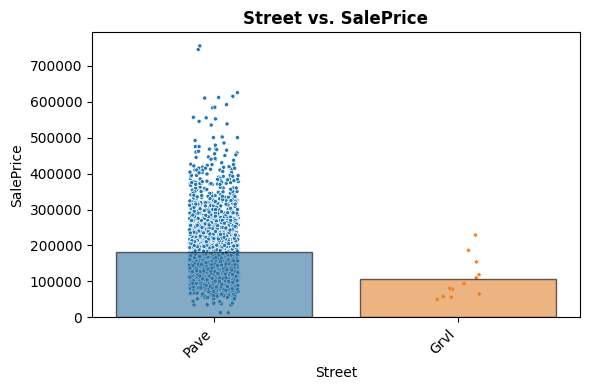

In [77]:
plot_categorical_vs_target(df, feature,);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `...`?
  - Does this feature appear to be a predictor of the target?
    - `...` ?


#### Alley


- "Alley": Type of alley access to property
  - Grvl Gravel
  - Pave Paved
  - NA No alley access


In [78]:
# Confirming the dtype to select correct EDA function
feature = "Alley"
df[feature].dtype

dtype('O')

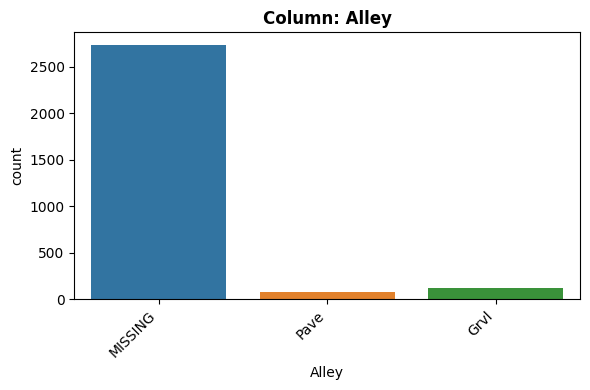

- NaN's Found: 2732 (93.24%)
- Unique Values: 3
- Most common value: 'MISSING' occurs 2732 times (93.24%)


In [79]:
explore_categorical(df,feature);


**Things to check for each feature:**


1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -  2732 null values (93.24%)
  - Impute with the category shown in the data dictionary (NA)


3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Low (3).

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - It may be beyond homeowner's control.



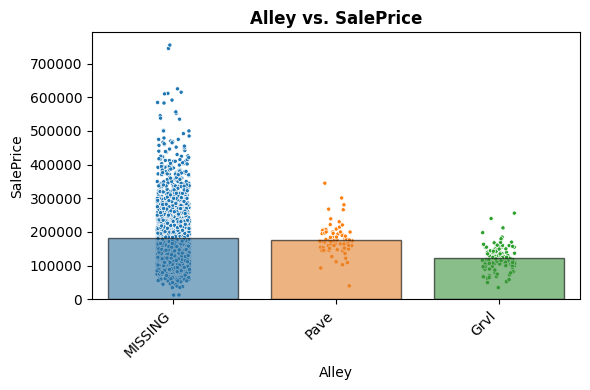

In [80]:
plot_categorical_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - I would think paved alleys would get a higher price.
  - Does this feature appear to be a predictor of the target?
    - Possibly. 


#### Utilities


- "Utilities": Type of utilities available
  - AllPub: All public Utilities (E,G,W,& S)
  - NoSewr Electricity, Gas, and Water (Septic Tank)
  - NoSeWa Electricity and Gas Only
  - ELO Electricity only


In [81]:
# Confirming the dtype to select correct EDA function
feature = "Utilities"
df[feature].dtype

dtype('O')

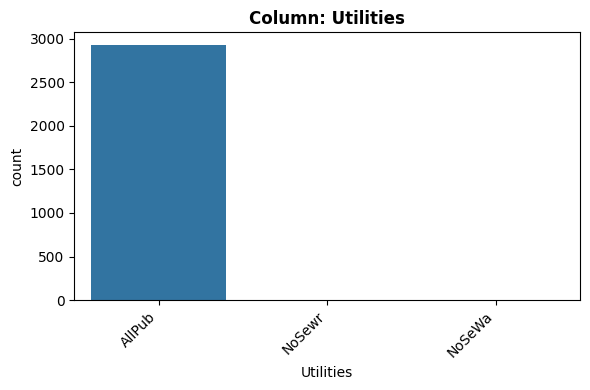

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'AllPub' occurs 2927 times (99.9%)

- [!] Warning: 'Utilities' is a constant or quasi-constant feature and should be dropped.


In [82]:
explore_categorical(df,feature);

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - Yes! Feature is quasi-constant: 'AllPub' makes up 99.9% of values.

4. What is the cardinality? Is it high?
  - Low (3).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - It may be beyond the homeowner's control.



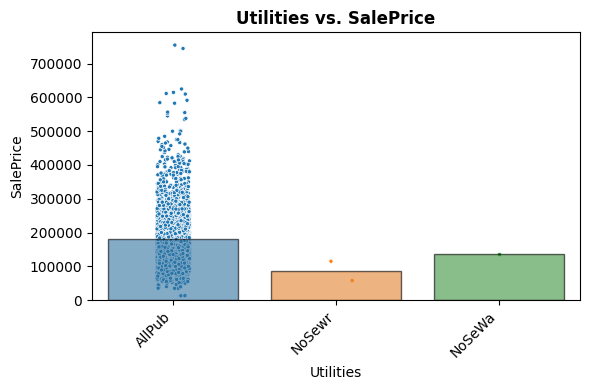

In [83]:
plot_categorical_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes
  - Does this feature appear to be a predictor of the target?
    - No, because there are so few examples of NoSewr and NoSeWa


#### Neighborhood


- "Neighborhood": Physical locations within Ames city limits:
  - Blmngtn: Bloomington Heights
  - Blueste: Bluestem
  - BrDale: Briardale
  - BrkSide: Brookside
  - ClearCr: Clear Creek
  - CollgCr College Creek
  - Crawfor Crawford
  - Edwards Edwards
  - Gilbert Gilbert
  - IDOTRR Iowa DOT and Rail Road
  - MeadowV Meadow Village
  - Mitchel Mitchell
  - Names North Ames
  - NoRidge Northridge
  - NPkVill Northpark Villa
  - NridgHt Northridge Heights
  - NWAmes Northwest Ames
  - OldTown Old Town
  - SWISU South & West of Iowa State University
  - Sawyer Sawyer
  - SawyerW Sawyer West
  - Somerst Somerset
  - StoneBr Stone Brook
  - Timber Timberland
  - Veenker Veenker


In [84]:
# Confirming the dtype to select correct EDA function
feature = "Neighborhood"
df[feature].dtype

dtype('O')

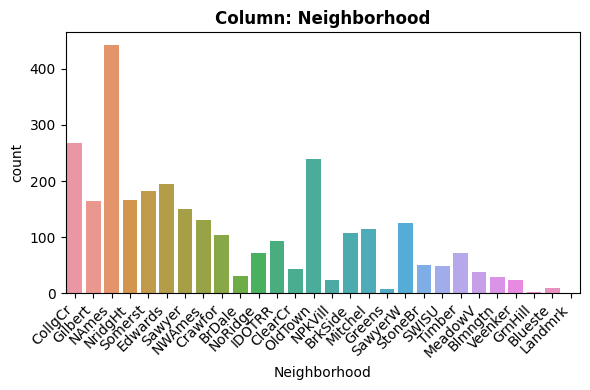

- NaN's Found: 0 (0.0%)
- Unique Values: 28
- Most common value: 'NAmes' occurs 443 times (15.12%)


In [85]:
explore_categorical(df, feature);

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values
  - No need to impute.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - High cardinality (28)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - A homeowner cannot change their neighborhood.



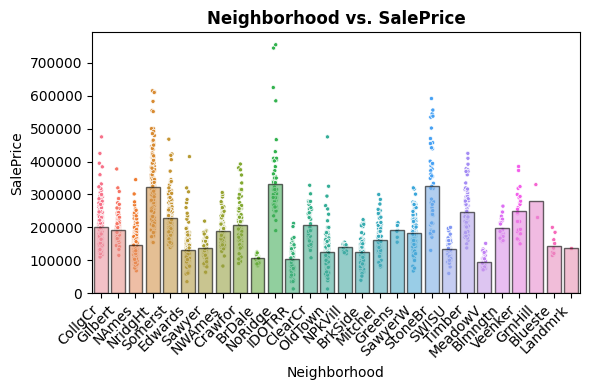

In [86]:
fig, ax = plot_categorical_vs_target(df, feature)

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes
  - Does this feature appear to be a predictor of the target?
    - Yes.


#### Bldg Type


- "BldgType": Type of dwelling:
  - 1Fam Single-family Detached
  - 2FmCon Two-family Conversion; originally built as one-family dwelling
  - Duplx Duplex
  - TwnhsE Townhouse End Unit
  - TwnhsI Townhouse Inside Unit


In [87]:
# Confirming the dtype to select correct EDA function
feature = "Bldg Type"
df[feature].dtype

dtype('O')

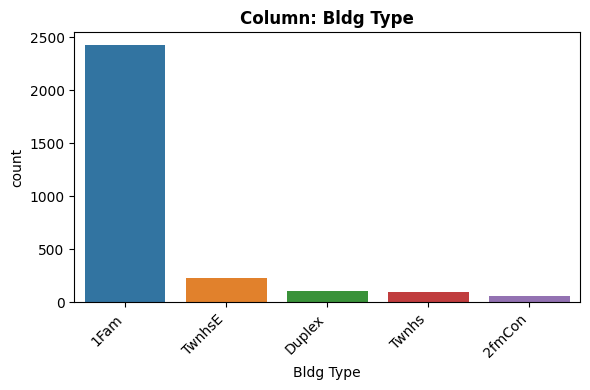

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: '1Fam' occurs 2425 times (82.76%)


In [88]:
explore_categorical(df,feature);

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - The homeowner may be able to convert their home to a duplex, etc.



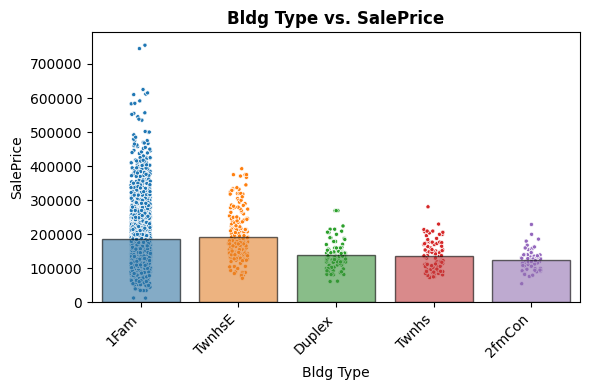

In [89]:
plot_categorical_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes it does, though there is a wide range of sale prices for some of the building types.


#### House Style


- HouseStyle: Style of dwelling
  - 1Story One story
  - 1.5Fin One and one-half story: 2nd level finished
  - 1.5Unf One and one-half story: 2nd level unfinished
  - 2Story Two story
  - 2.5Fin Two and one-half story: 2nd level finished
  - 2.5Unf Two and one-half story: 2nd level unfinished
  - SFoyer Split Foyer
  - SLvl Split Level


In [90]:
# Confirming the dtype to select correct EDA function
feature = "House Style"
df[feature].dtype

dtype('O')

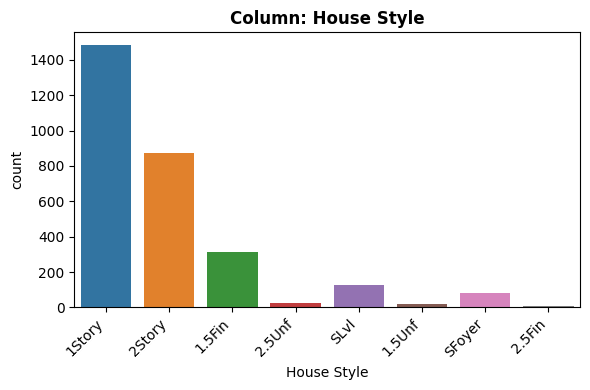

- NaN's Found: 0 (0.0%)
- Unique Values: 8
- Most common value: '1Story' occurs 1481 times (50.55%)


In [91]:
explore_categorical(df, feature);

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.
  - No need to impute.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - ~medium cardinality (8)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No, the homeowner could remodel their home to change this.



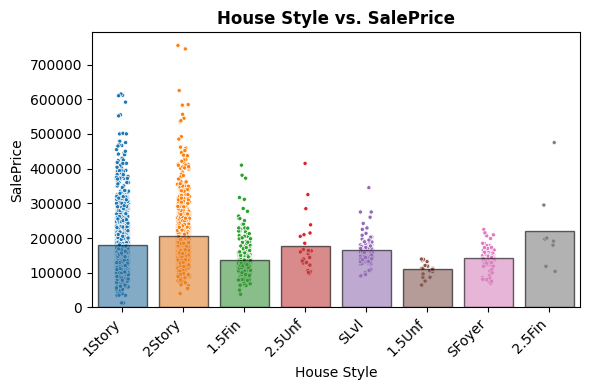

In [92]:
plot_categorical_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Possibily, but it is hard to tell due to the range of values within some of the categories.


#### Overall Qual


- "OverallQual": Overall material and finish quality
  -  10: Very Excellent
  -  9: Excellent
  -  8: Very Good
  -  7: Good
  -  6: Above Average
  -  5: Average
  -  4: Below Average
  -  3: Fair
  -  2: Poor
  -  1: Very Poor


In [93]:
# Confirming the dtype to select correct EDA function
feature = "Overall Qual"
df[feature].dtype

dtype('int64')

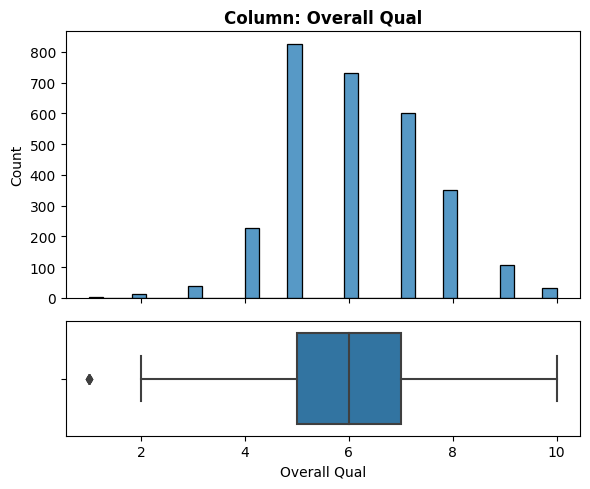

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: '5' occurs 825 times (28.16%)


In [94]:
explore_numeric(df,feature);

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal (but already numeric)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



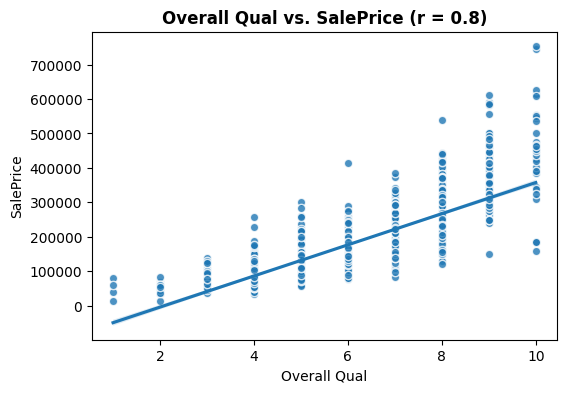

In [95]:
plot_numeric_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes
  - Does this feature appear to be a predictor of the target?
    - Yes!

#### Overall Cond


- "OverallCond": Overall condition rating
  -  10: Very Excellent
  -  9: Excellent
  -  8: Very Good
  -  7: Good
  -  6: Above Average
  -  5: Average
  -  4: Below Average
  -  3: Fair
  -  2: Poor
  -  1: Very Poor


In [96]:
# Confirming the dtype to select correct EDA function
feature = "Overall Cond"
df[feature].dtype

dtype('int64')

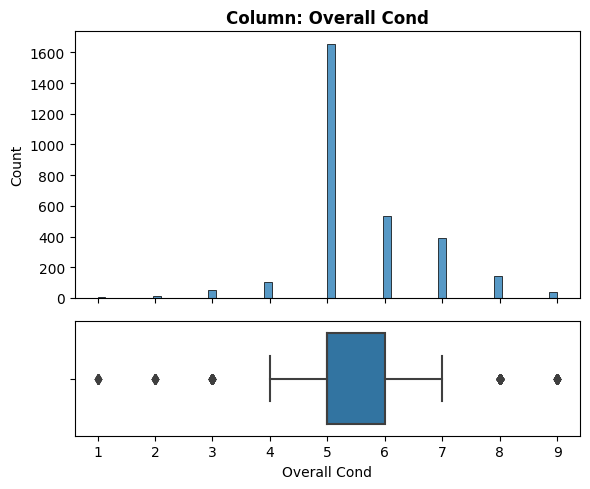

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '5' occurs 1654 times (56.45%)


In [97]:
explore_numeric(df, feature);

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal, already numeric datatype. (No encoding needed).

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 9, not high, especially since it will treated as a numeric feature.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



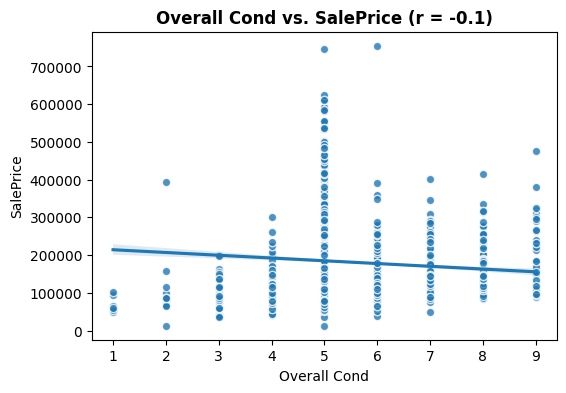

In [98]:
plot_numeric_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Not really. The trendline is somewhat flat and the correlation is low.


#### Year Built


- "YearBuilt": Original construction date


In [99]:
# Confirming the dtype to select correct EDA function
feature = "Year Built"
df[feature].dtype

dtype('int64')

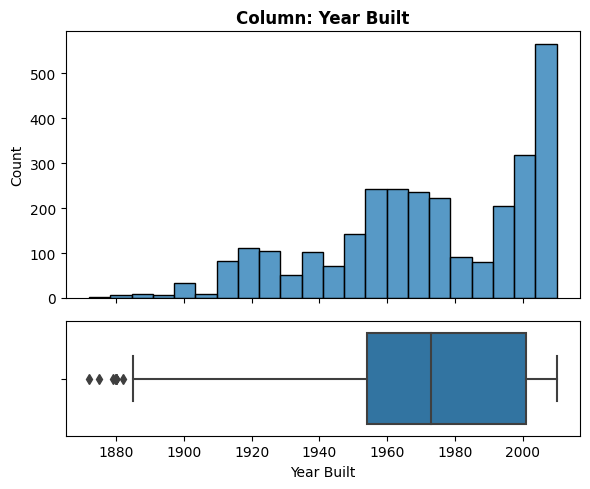

- NaN's Found: 0 (0.0%)
- Unique Values: 118
- Most common value: '2005' occurs 142 times (4.85%)


In [100]:
explore_numeric(df, feature); 

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - The homeowner cannot change the year their home was built. We should exclude it from the model.



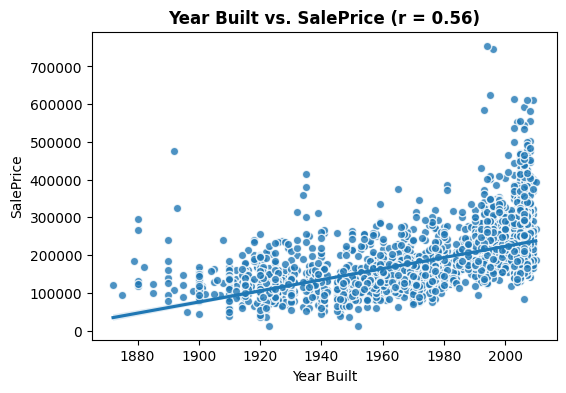

In [101]:
plot_numeric_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, but I could see both older homes and newer homes having a higher sale price.
  - Does this feature appear to be a predictor of the target?
    - Yes.


#### Year Remodeled


- "Year Remodeled" (renamed from original "YearRemodAdd"): 
  - Remodel date (same as construction date if no remodeling or additions)


In [102]:
# Confirming the dtype to select correct EDA function
feature = "Year Remodeled"
df[feature].dtype

dtype('int64')

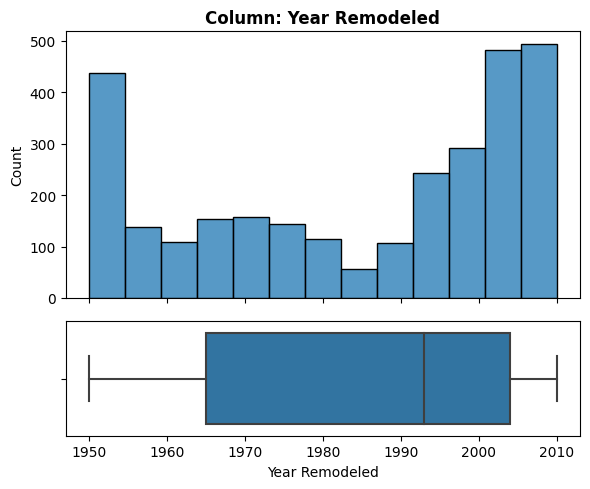

- NaN's Found: 0 (0.0%)
- Unique Values: 61
- Most common value: '1950' occurs 361 times (12.32%)


In [103]:
explore_numeric(df, feature);

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric feature).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No! This is very helpful feature, since our stakeholders are open to remodeling.



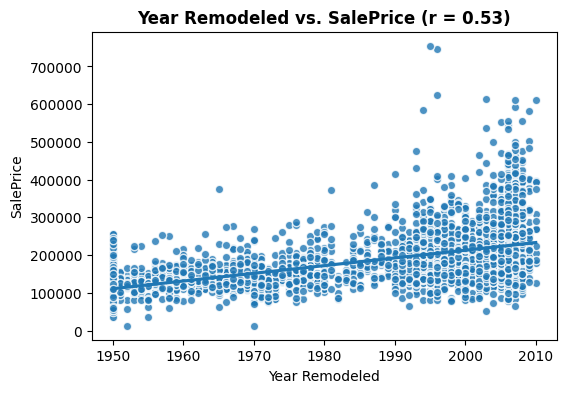

In [104]:
plot_numeric_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes, there is a positive correlation between this and the target.


#### Exter Qual


- ExterQual: Exterior material quality
  - Ex: Excellent
  - Gd: Good
  - TA: Average/Typical
  - Fa: Fair
  - Po: Poor


In [105]:
# Confirming the dtype to select correct EDA function
feature = "Exter Qual"
df[feature].dtype

dtype('O')

In [106]:
qual_order = ['Po','Fa','TA','Gd','Ex']

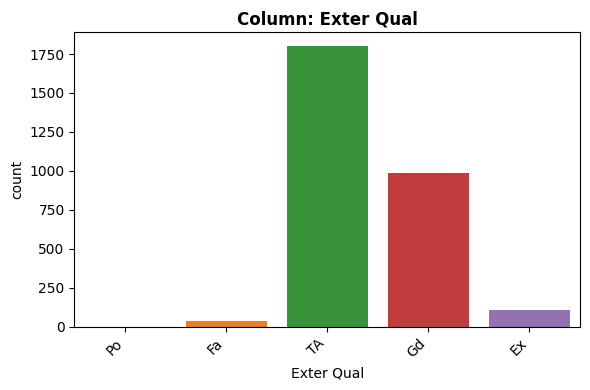

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'TA' occurs 1799 times (61.4%)


In [107]:
explore_categorical(df, feature, order=qual_order);

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Low (only 4 unique values).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



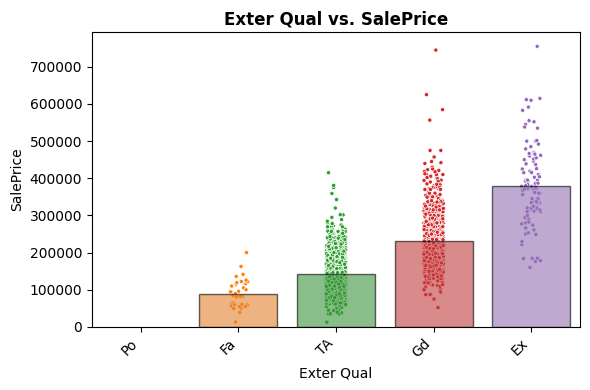

In [108]:
plot_categorical_vs_target(df, feature, order=qual_order);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Very much so!


#### Exter Cond


- ExterCond: Present condition of the material on the exterior
  - Ex: Excellent
  - Gd: Good
  - TA: Average/Typical
  - Fa: Fair
  - Po: Poor


In [109]:
# Confirming the dtype to select correct EDA function
feature = "Exter Cond"
df[feature].dtype

dtype('O')

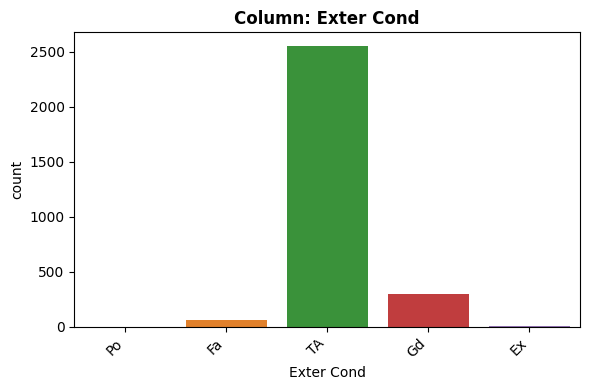

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'TA' occurs 2549 times (87.0%)


In [110]:
explore_categorical(df,  feature, order = qual_order);

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - No, but TA is very common (87% of feature)

4. What is the cardinality? Is it high?
  - Low, only 5.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



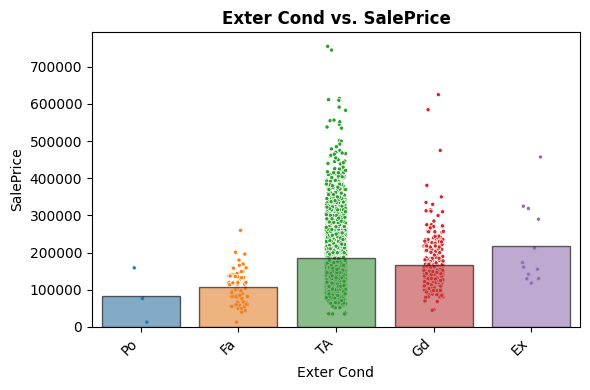

In [111]:
plot_categorical_vs_target(df, feature, order=qual_order);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Possibily, but the range of values for TA is very broad.


#### Bsmt Unf Sqft


- "BsmtUnfSF": Unfinished square feet of basement area

In [112]:
# Confirming the dtype to select correct EDA function
feature = "Bsmt Unf Sqft"
df[feature].dtype

dtype('float64')

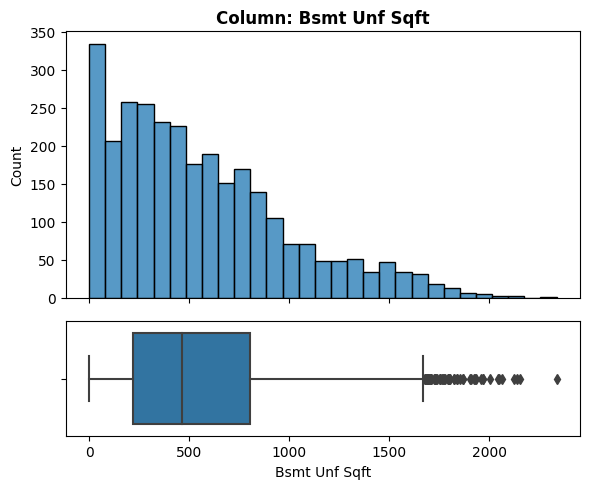

- NaN's Found: 1 (0.03%)
- Unique Values: 1137
- Most common value: '0.0' occurs 244 times (8.33%)


In [113]:
explore_numeric(df, feature);

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1 null value (0.03%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



- NaN's Found: 1 (0.03%)


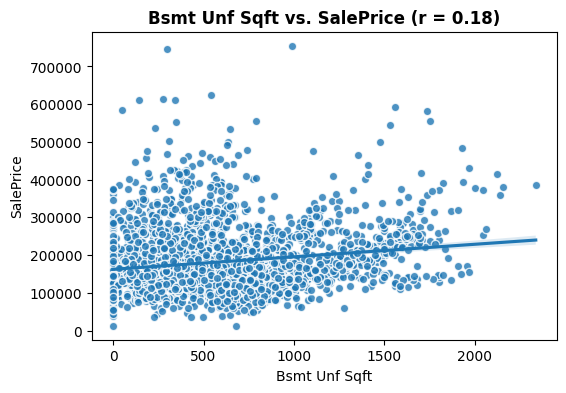

In [114]:
plot_numeric_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Possibly, but unfinished basement would likely be less desirable than finished basement. 
  - Does this feature appear to be a predictor of the target?
    - Not very, low correlation.


#### Total Bsmnt Sqft


- "TotalBsmtSF": Total square feet of basement area

In [115]:
# Confirming the dtype to select correct EDA function
feature = "Total Bsmnt Sqft"
df[feature].dtype

dtype('float64')

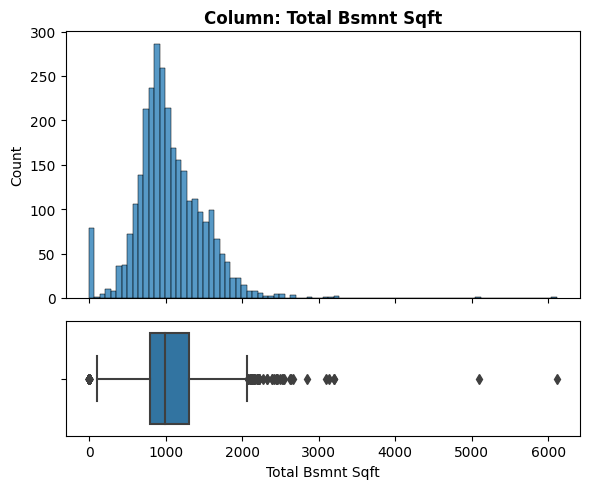

- NaN's Found: 1 (0.03%)
- Unique Values: 1058
- Most common value: '0.0' occurs 79 times (2.7%)


In [116]:
explore_numeric(df, feature);

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1 null (0.03%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable, numeric.

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



- NaN's Found: 1 (0.03%)


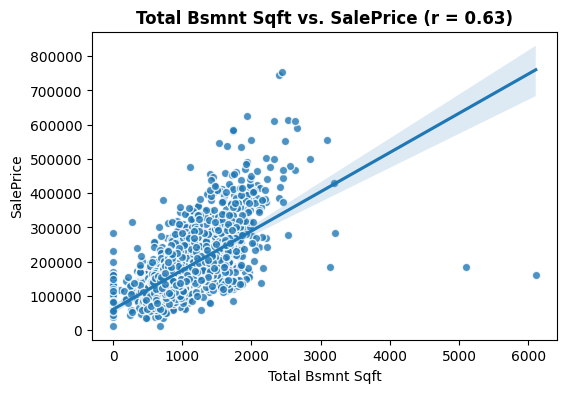

In [117]:
plot_numeric_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes it does. 


#### Central Air


- "CentralAir": Central air conditioning
  - N: No
  - Y: Yes


In [118]:
# Confirming the dtype to select correct EDA function
feature = "Central Air"
df[feature].dtype

dtype('O')

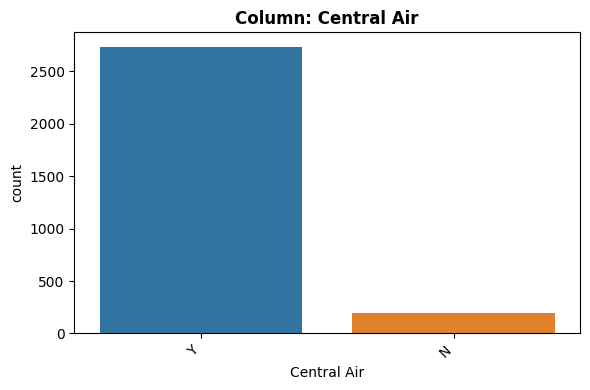

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Y' occurs 2734 times (93.31%)


In [119]:
explore_categorical(df, feature);

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - No, but most homes have central air (93%)
4. What is the cardinality? Is it high?
  - Very low (2)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



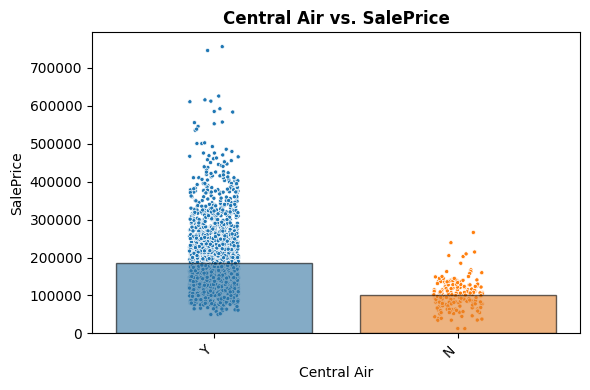

In [120]:
plot_categorical_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, central air is a very desirable trait. 
  - Does this feature appear to be a predictor of the target?
    - Yes.


#### Living Area Sqft


- "Living Area Sqft" (renamed from original  "GrLivArea"): 
  - Above grade (ground) living area square feet

In [121]:
# Confirming the dtype to select correct EDA function
feature = "Living Area Sqft"
df[feature].dtype

dtype('float64')

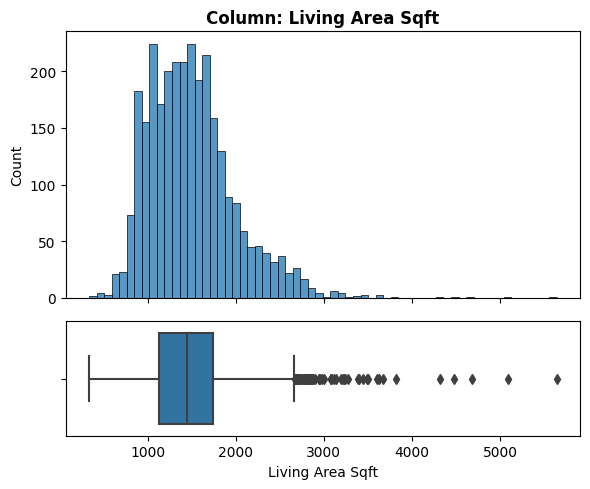

- NaN's Found: 0 (0.0%)
- Unique Values: 1292
- Most common value: '864.0' occurs 41 times (1.4%)


In [122]:
explore_numeric(df, feature);

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



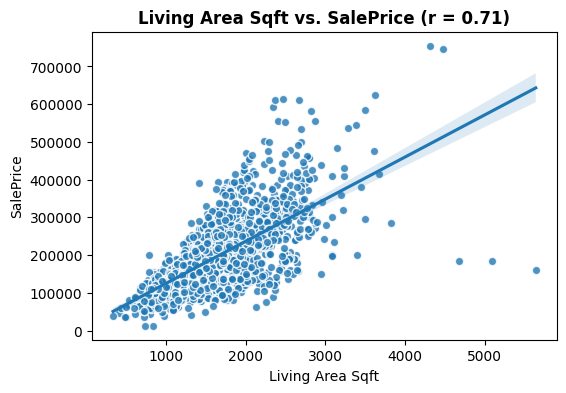

In [123]:
plot_numeric_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, square footage is a critical house trait.
  - Does this feature appear to be a predictor of the target?
    - Yes!


#### Bedroom


- "Bedroom": Number of bedrooms above basement level


In [124]:
# Confirming the dtype to select correct EDA function
feature = "Bedroom"
df[feature].dtype

dtype('int64')

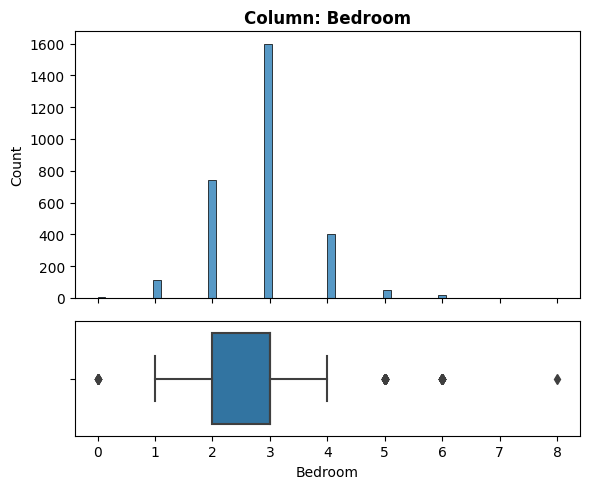

- NaN's Found: 0 (0.0%)
- Unique Values: 8
- Most common value: '3' occurs 1597 times (54.51%)


In [125]:
explore_numeric(df, feature);

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



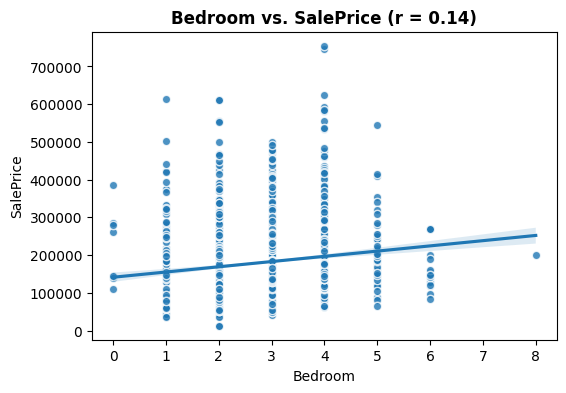

In [126]:
plot_numeric_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I would think more bedrooms is better.
  - Does this feature appear to be a predictor of the target?
    - Possibly, though it is suprising that the largest number of bedrooms has a lower price.


#### Kitchen


- "Kitchen": Number of kitchens


In [127]:
# Confirming the dtype to select correct EDA function
feature = "Kitchen"
df[feature].dtype

dtype('int64')

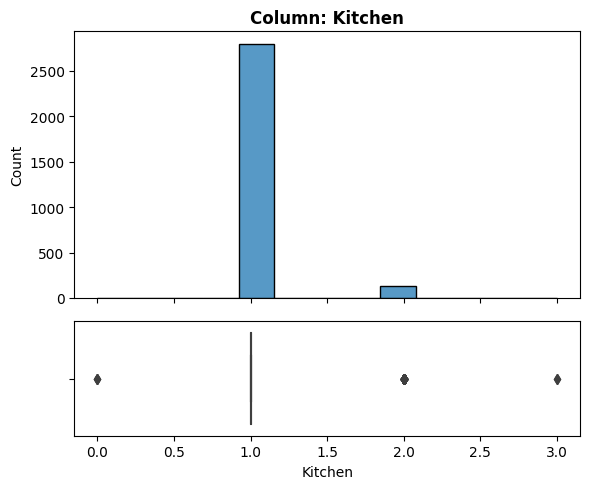

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: '1' occurs 2796 times (95.43%)


In [128]:
explore_numeric(df, feature);

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



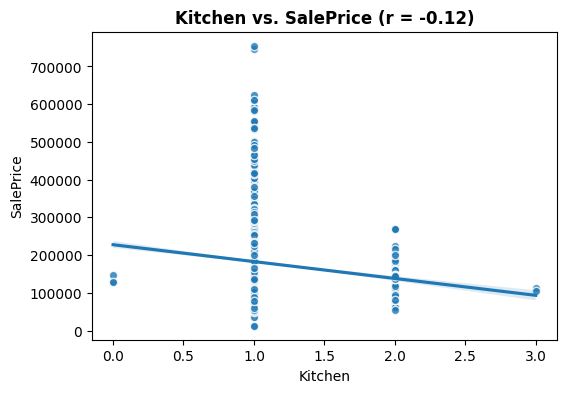

In [129]:
plot_numeric_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - I would think that having more kitchens would lead to a higher price.
  - Does this feature appear to be a predictor of the target?
    - Possibly, but there is a negative correlation when we would expect positive.


#### Total Rooms


- "Total Rooms" (renamed from original "TotRmsAbvGrd"):
  -  Total rooms above grade (does not include bathrooms)

In [130]:
df.columns

Index(['MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Utilities',
       'Neighborhood', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remodeled', 'Exter Qual',
       'Exter Cond', 'Bsmt Unf Sqft', 'Total Bsmnt Sqft', 'Central Air',
       'Living Area Sqft', 'Bedroom', 'Kitchen', 'Total Rooms', 'Garage Type',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Fence', 'SalePrice', 'Month', 'Year',
       'Total Full Baths', 'Total Half Baths'],
      dtype='object')

In [131]:
# Confirming the dtype to select correct EDA function
feature = "Total Rooms"
df[feature].dtype

dtype('int64')

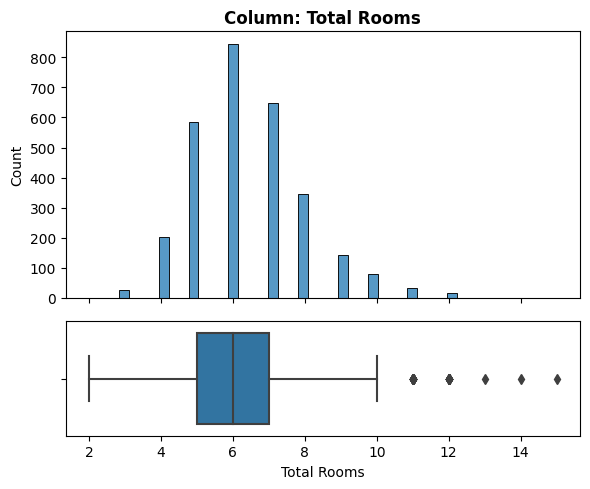

- NaN's Found: 0 (0.0%)
- Unique Values: 14
- Most common value: '6' occurs 844 times (28.81%)


In [132]:
explore_numeric(df, feature);

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



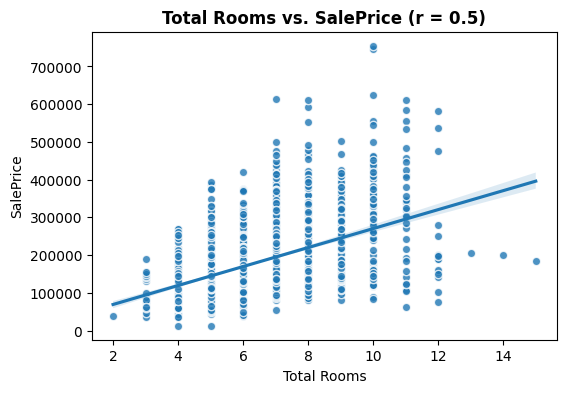

In [133]:
plot_numeric_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes it has a strong positive correlation to the target.


#### Garage Type


- "GarageType": Garage location:
  - 2Types: More than one type of garage
  - Attchd: Attached to home
  - Basment: Basement Garage
  - BuiltIn: Built-In (Garage part of house - typically has room above garage)
  - CarPort: Car Port
  - Detchd" Detached from home
  - NA: No Garage


In [134]:
# Confirming the dtype to select correct EDA function
feature = "Garage Type"
df[feature].dtype

dtype('O')

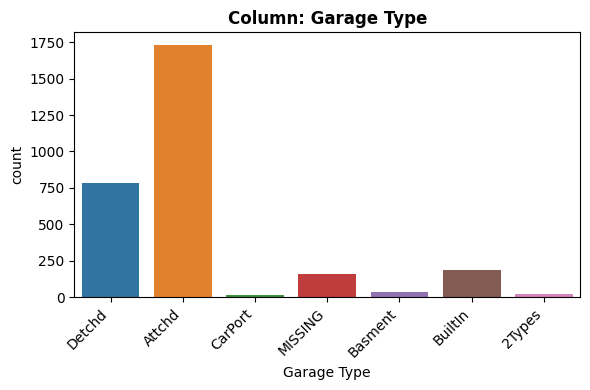

- NaN's Found: 157 (5.36%)
- Unique Values: 7
- Most common value: 'Attchd' occurs 1731 times (59.08%)


In [135]:
explore_categorical(df, feature);

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 157 (5.35%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Low-Medium (7)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



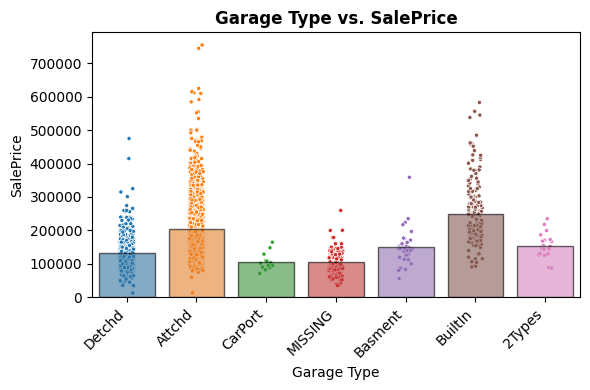

In [136]:
plot_categorical_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes, but there is a broad range of values for some of the categories.


#### Garage Yr Blt


- GarageYrBlt: Year garage was built


In [137]:
# Confirming the dtype to select correct EDA function
feature = "Garage Yr Blt"
df[feature].dtype

dtype('float64')

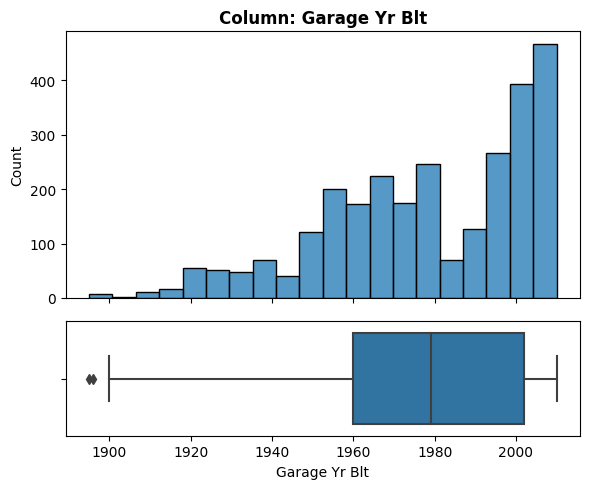

- NaN's Found: 160 (5.46%)
- Unique Values: 102
- Most common value: 'nan' occurs 160 times (5.46%)


In [138]:
explore_numeric(df, feature);

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 160 null values (5.46%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



- NaN's Found: 160 (5.46%)


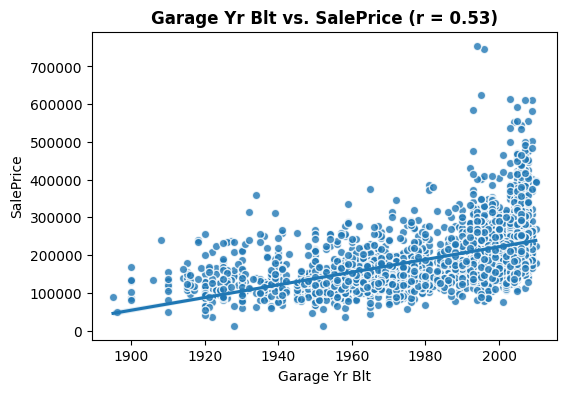

In [139]:
plot_numeric_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, more recent garages are probably more appealing.
  - Does this feature appear to be a predictor of the target?
    - Yes it does! Recent garage yr builts, especially.


#### Garage Cars


- GarageCars: Size of garage in car capacity


In [140]:
# Confirming the dtype to select correct EDA function
feature = "Garage Cars"
df[feature].dtype

dtype('float64')

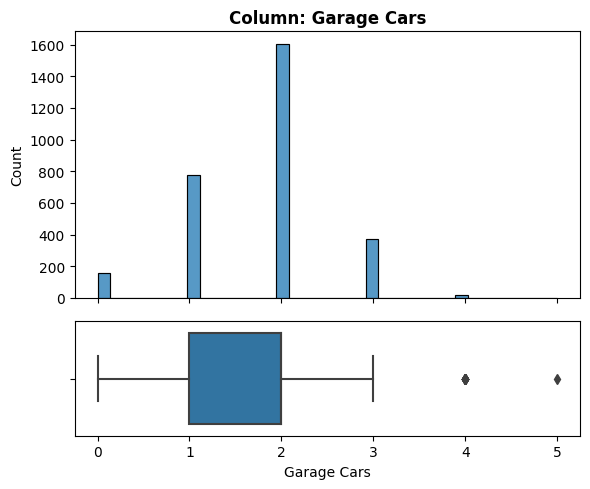

- NaN's Found: 1 (0.03%)
- Unique Values: 6
- Most common value: '2.0' occurs 1603 times (54.71%)


In [141]:
explore_numeric(df, feature);

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1 (0.03%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



- NaN's Found: 1 (0.03%)


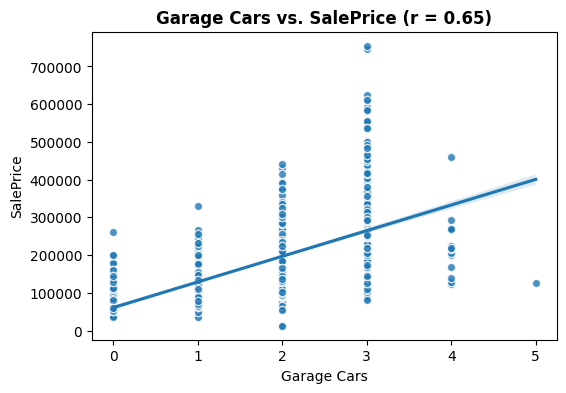

In [142]:
plot_numeric_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    -  Yes I expect more cars are more desirable. 
  - Does this feature appear to be a predictor of the target?
    - Yes!


#### Garage Area


- GarageArea: Size of garage in square feet


In [143]:
# Confirming the dtype to select correct EDA function
feature = "Garage Area"
df[feature].dtype

dtype('float64')

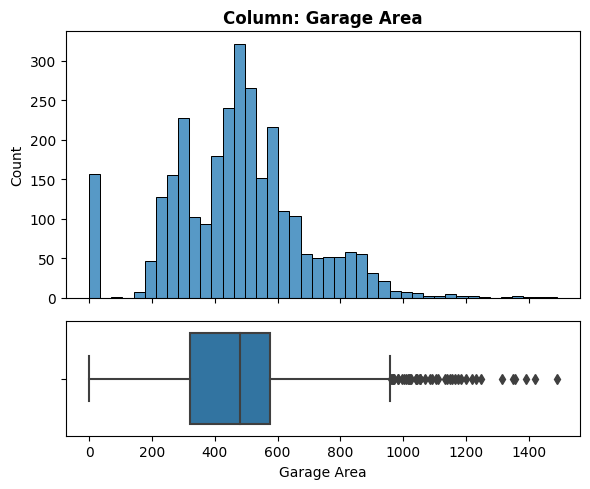

- NaN's Found: 1 (0.03%)
- Unique Values: 603
- Most common value: '0.0' occurs 157 times (5.36%)


In [144]:
explore_numeric(df, feature);

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1 null value (0.03%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



- NaN's Found: 1 (0.03%)


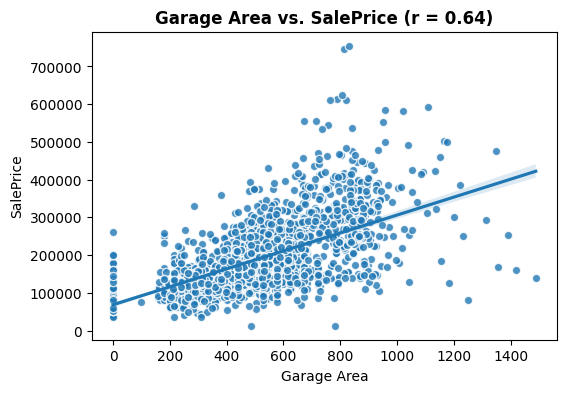

In [145]:
plot_numeric_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, similar to garage cars.
  - Does this feature appear to be a predictor of the target?
    - Yes.


#### Garage Qual


- "GarageQual": Garage quality:
  - Ex: Excellent
  - Gd: Good
  - TA: Typical/Average
  - Fa: Fair
  - Po: Poor
  - NA: No Garage


In [146]:
# Confirming the dtype to select correct EDA function
feature = "Garage Qual"
df[feature].dtype

dtype('O')

In [147]:
qual_cond_order = ["NA",'Po', 'Fa', 'TA', 'Gd', 'Ex']

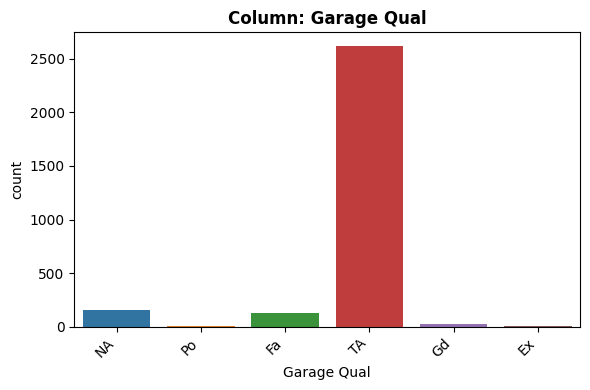

- NaN's Found: 159 (5.43%)
- Unique Values: 6
- Most common value: 'TA' occurs 2615 times (89.25%)


In [148]:
explore_categorical(df, feature, order=qual_cond_order, placeholder = "NA");

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 159 (5.43%)

3. Is the feature constant or quasi-constant?
  - No, but  89% of the values are TA.

4. What is the cardinality? Is it high?
  - Low (6)

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



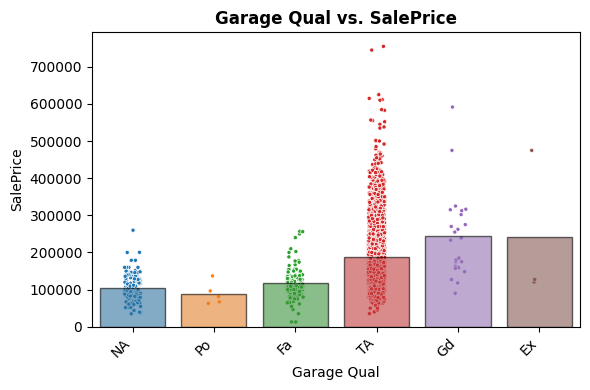

In [149]:
plot_categorical_vs_target(df, feature, order=qual_cond_order, placeholder='NA');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Possibly, but the range of values in TA is broad.


#### Garage Cond


- "GarageCond": Garage condition:
  - Ex: Excellent
  - Gd: Good
  - TA: Typical/Average
  - Fa: Fair
  - Po: Poor
  - NA: No Garage


In [150]:
# Confirming the dtype to select correct EDA function
feature = "Garage Cond"
df[feature].dtype

dtype('O')

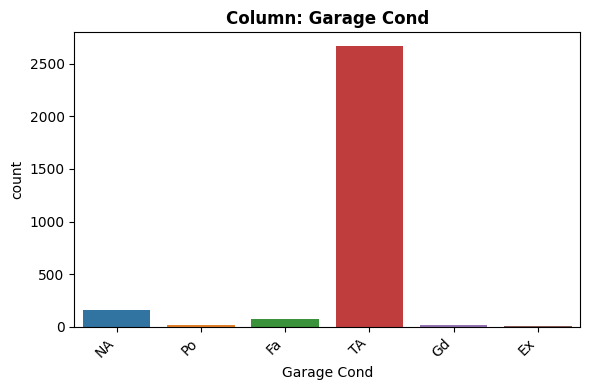

- NaN's Found: 159 (5.43%)
- Unique Values: 6
- Most common value: 'TA' occurs 2665 times (90.96%)


In [151]:
explore_categorical(df, feature, order=qual_cond_order, placeholder = "NA");

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 159 (5.43%)

3. Is the feature constant or quasi-constant?
  - No, but  91% of the values are TA.

4. What is the cardinality? Is it high?
  - Low, 6

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



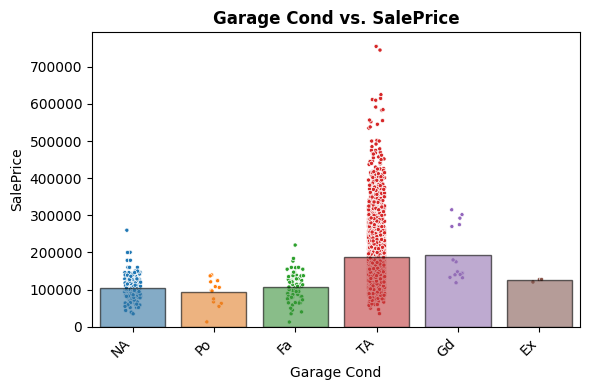

In [152]:
plot_categorical_vs_target(df, feature, order=qual_cond_order, placeholder='NA');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Possibly, but the rnage of values in TA is broad.


#### Paved Drive


- PavedDrive: Paved driveway
  - Y: Paved
  - P: Partial Pavement
  - N: Dirt/Gravel


In [153]:
# Confirming the dtype to select correct EDA function
feature = "Paved Drive"
df[feature].dtype

dtype('O')

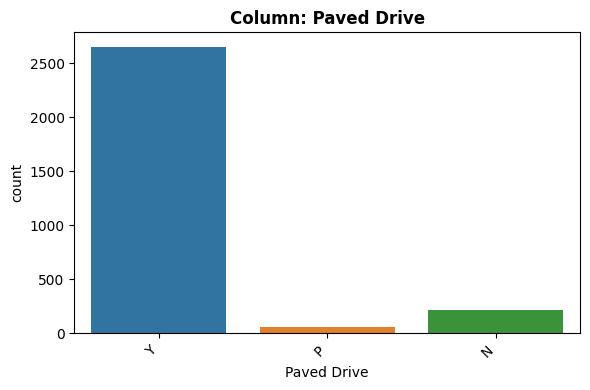

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Y' occurs 2652 times (90.51%)


In [154]:
explore_categorical(df, feature);

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No, but 90% of the values are "Y"

4. What is the cardinality? Is it high?
  - Low (3)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No, the homeowner can get their driveway paved.



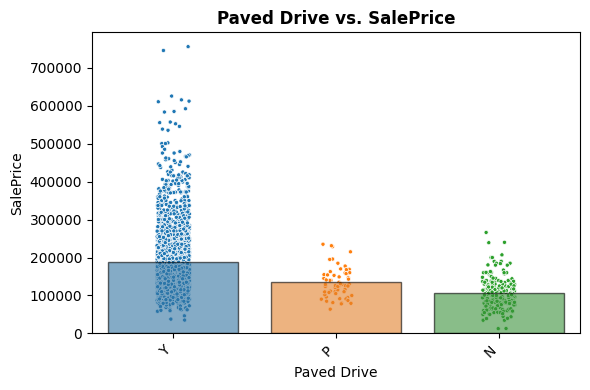

In [155]:
plot_categorical_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes.


#### Fence



- "Fence": Fence quality:
  - GdPrv: Good Privacy
  - MnPrv: Minimum Privacy
  - GdWo: Good Wood
  - MnWw: Minimum Wood/Wire
  - NA: No Fence



In [156]:
# Confirming the dtype to select correct EDA function
feature = "Fence"
df[feature].dtype

dtype('O')

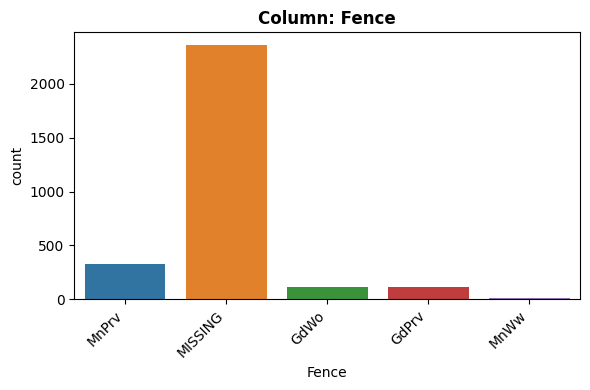

- NaN's Found: 2358 (80.48%)
- Unique Values: 5
- Most common value: 'MISSING' occurs 2358 times (80.48%)


In [157]:
explore_categorical(df, feature);

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2,358 null values (80.48%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Low (5)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



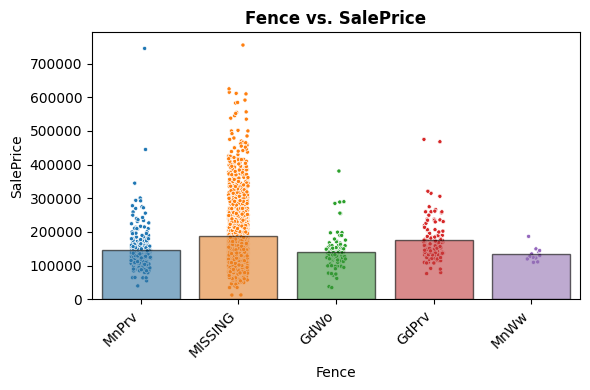

In [158]:
plot_categorical_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Possibly, but the rnage of sale prices for homes missing a value for fench is very wide.


#### SalePrice


- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict for this challenge.

In [159]:
# Confirming the dtype to select correct EDA function
feature = "SalePrice"
df[feature].dtype

dtype('float64')

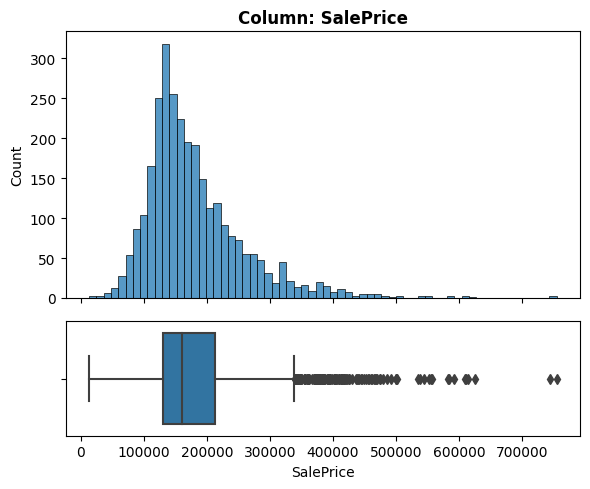

- NaN's Found: 0 (0.0%)
- Unique Values: 1032
- Most common value: '135000.0' occurs 34 times (1.16%)


In [160]:
explore_numeric(df, feature);

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Our Target (numeric)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable.

5. Would we know this BEFORE the target is determined?
  - No! It IS the target!

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.




#### Month


- Month Sold

In [161]:
# Confirming the dtype to select correct EDA function
feature = "Month"
df[feature].dtype

dtype('O')

In [162]:
df['Month'] = df['Month'].astype(float)

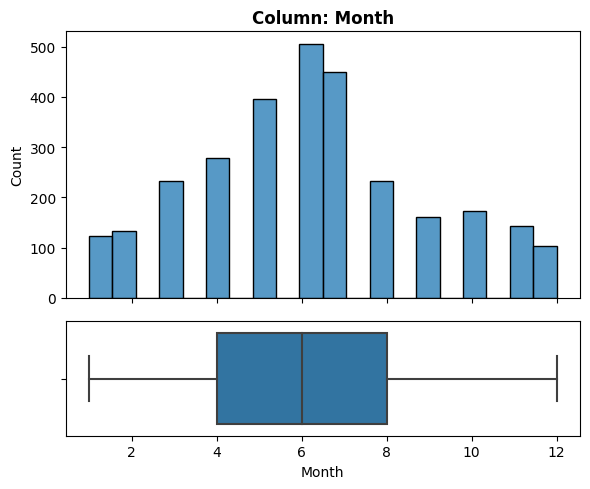

- NaN's Found: 0 (0.0%)
- Unique Values: 12
- Most common value: '6.0' occurs 505 times (17.24%)


In [163]:
explore_numeric(df, feature); 

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric/ordinal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - Medium (12)

5. Would we know this BEFORE the target is determined?
  - No, we wouldn't know what month the sale will happen.

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes, the homeowner can't control the sale date of their home.



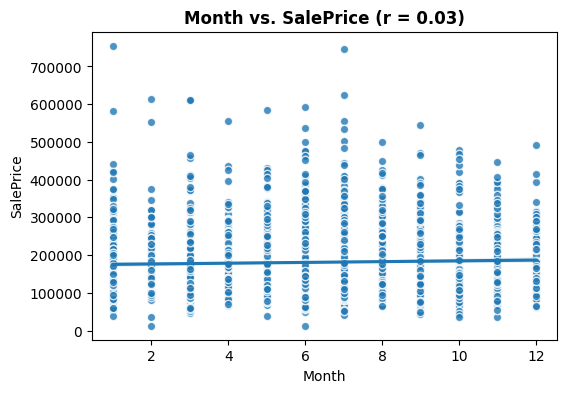

In [164]:
plot_numeric_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Not sure.
  - Does this feature appear to be a predictor of the target?
    - No.


#### Year


- Year Sold

In [165]:
# Confirming the dtype to select correct EDA function
feature = "Year"
df[feature].dtype

dtype('O')

In [166]:
df['Year'] = df['Year'].astype(float)

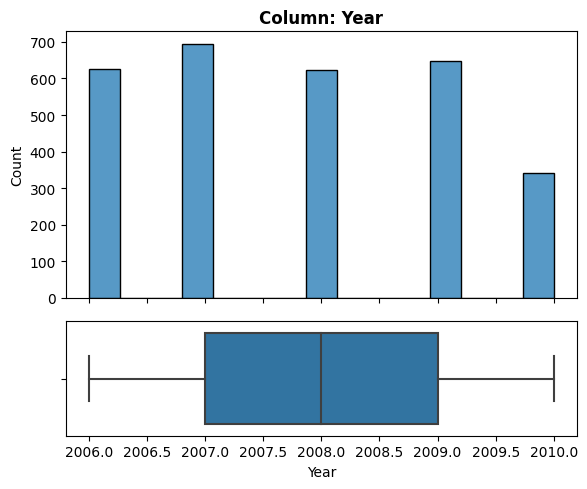

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: '2007.0' occurs 694 times (23.69%)


In [167]:
explore_numeric(df, feature);

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric)

5. Would we know this BEFORE the target is determined?
  - No, also, these years are long ago and may not be helpful in predicting with current/modern years.

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes, also not fully under the homeowner's control, but also because the housing market from this time period does not account for modern yearly trends in price.



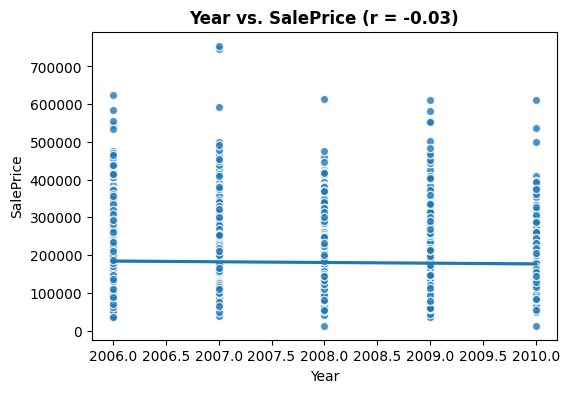

In [168]:
plot_numeric_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No.
  - Does this feature appear to be a predictor of the target?
    - No.


#### Total Full Baths


- Engineered: Combined Full Baths + Bsmnt Full Baths

In [169]:
# Confirming the dtype to select correct EDA function
feature = "Total Full Baths"
df[feature].dtype

dtype('float64')

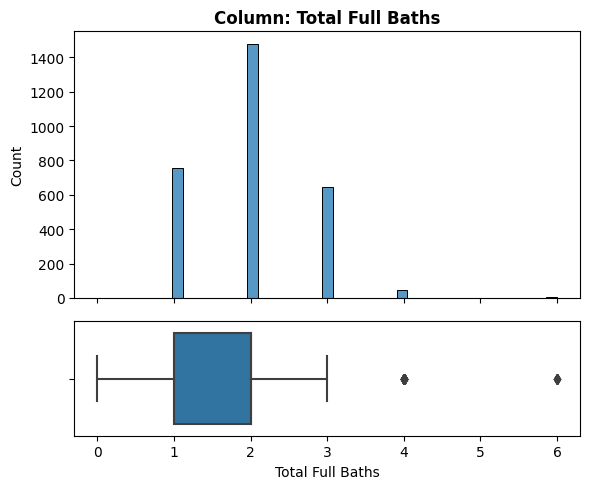

- NaN's Found: 2 (0.07%)
- Unique Values: 6
- Most common value: '2.0' occurs 1477 times (50.41%)


In [170]:
explore_numeric(df, feature); 

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2 (0.07%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



- NaN's Found: 2 (0.07%)


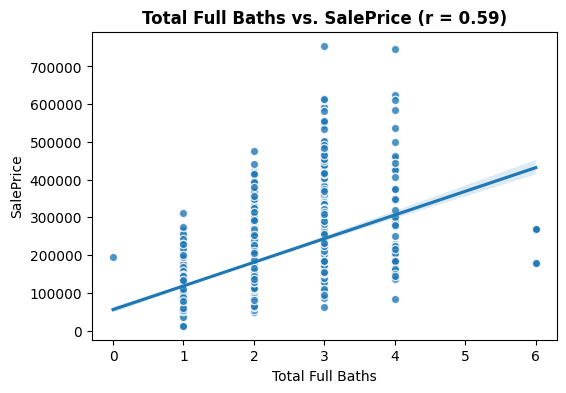

In [171]:
plot_numeric_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I would expect the more full baths the higher the price.
  - Does this feature appear to be a predictor of the target?
    - Yes! Strong positive correlation.


#### Total Half Baths

- Engineered: Combined Half Baths + Bsmnt Half Baths

In [172]:
# Confirming the dtype to select correct EDA function
feature = "Total Half Baths"
df[feature].dtype

dtype('float64')

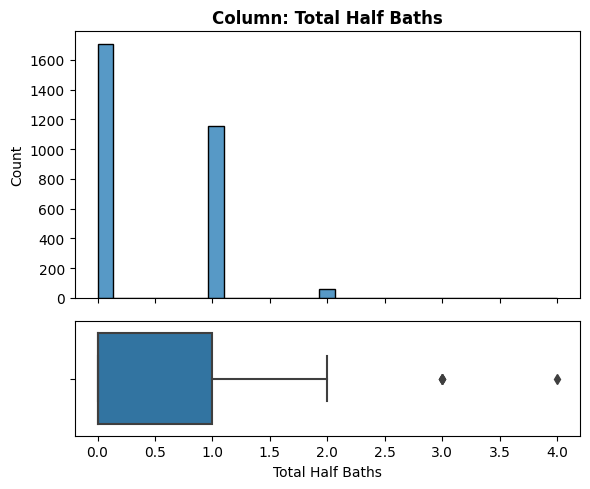

- NaN's Found: 5 (0.17%)
- Unique Values: 5
- Most common value: '0.0' occurs 1706 times (58.23%)


In [173]:
explore_numeric(df, feature);

**EDA Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 5 (0.17%)

3. Is the feature constant or quasi-constant?
  - No. 

4. What is the cardinality? Is it high?
  - Not applicable (numeric)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



- NaN's Found: 5 (0.17%)


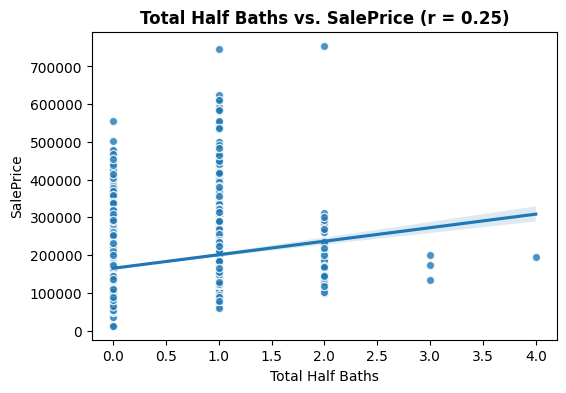

In [174]:
plot_numeric_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I would think more of any type of bathroom would increase price.
  - Does this feature appear to be a predictor of the target?
    - Somewhat, but it loks like having more than 2 half baths decrease the home value?

<a name='phase3'></a>
# Phase 3) Data Preparation

In [178]:
# Separate features vs target & train/test split
drop_from_model = ['Utilities', # Quasi-constant
                   "Street", # Quasi-constant
                   'MS Zoning', # Stakeholder can't change
                   'Lot Frontage',  # Stakeholder can't change
                   'Lot Area', # Stakeholder can't change
                   'Neighborhood',  # Stakeholder can't change
                   'Year Built'] # Stakeholder can't change
X = df.drop(columns = [*drop_from_model,'SalePrice'])
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.head()

Alley Bldg Type House Style  Overall Qual  Overall Cond  \
PID                                                                 
905475520   NaN      1Fam      1Story             4             5   
909254010   NaN      1Fam      2Story             7             8   
531450090   NaN      1Fam      1Story             6             5   
903400040  Pave      1Fam      2Story             6             6   
527107130   NaN      1Fam        SLvl             7             5   

           Year Remodeled Exter Qual Exter Cond  Bsmt Unf Sqft  \
PID                                                              
905475520            1994         TA         TA            0.0   
909254010            1990         TA         TA          600.0   
531450090            1991         TA         TA           78.0   
903400040            1950         TA         TA          764.0   
527107130            1997         TA         TA          100.0   

           Total Bsmnt Sqft Central Air  Living Area Sqft  Bedroom  Kitchen  \
PID                                                                           
905475520               0.0           N             943.0        3        1   
909254010             600.0           Y            1228.0        3        1   
531450090            1278.0           Y            1294.0        3        1   
903400040             764.0           Y            1824.0        3        1   
527107130             384.0           Y            1628.0        3        1   

           Total Rooms Garage Type  Garage Yr Blt  Garage Cars  Garage Area  \
PID                                                                           
905475520            5      Detchd         1958.0          1.0        308.0   
909254010            6      Detchd         1918.0          1.0        215.0   
531450090            6      Attchd         1991.0          2.0        496.0   
903400040            8      Detchd         1940.0          2.0        520.0   
527107130            7     BuiltIn         1996.0          2.0        390.0   

          Garage Qual Garage Cond Paved Drive  Fence  Month    Year  \
PID                                                                   
905475520          TA          TA           N    NaN    8.0  2007.0   
909254010          Fa          TA           Y  MnPrv    5.0  2009.0   
531450090          TA          TA           Y   GdWo    6.0  2008.0   
903400040          TA          TA           N  GdPrv    7.0  2007.0   
527107130          TA          TA           Y    NaN    6.0  2009.0   

           Total Full Baths  Total Half Baths  
PID                                            
905475520               1.0               0.0  
909254010               1.0               0.0  
531450090               3.0               0.0  
903400040               1.0               0.0  
527107130               2.0               1.0

### Preprocessing from ColumnTransformer Lesson

In [179]:
## PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
# print("Numeric Columns:", num_cols)

# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()

# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)

# Making a numeric tuple for ColumnTransformer
#           (choose_a_name, pipeline_or_transformer, list_of_columns)
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['Overall Qual', 'Overall Cond', 'Year Remodeled', 'Bsmt Unf Sqft',
        'Total Bsmnt Sqft', 'Living Area Sqft', 'Bedroom', 'Kitchen',
        'Total Rooms', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Month',
        'Year', 'Total Full Baths', 'Total Half Baths'],
       dtype='object'))

In [180]:
## PREPROCESSING PIPELINE FOR ORDINAL DATA

# Save list of column names
ord_cols = ['Exter Qual','Exter Cond', 'Garage Qual',"Garage Cond"]
# print("Ordinal Columns:", ord_cols)


# Create imputer for ordinal data 
impute_na_ord = SimpleImputer(strategy='constant', fill_value='NA')

## Making the OrdinalEncoder
# Specifying order of categories for our  Ordinal Qual/Cond Columms
qual_cond_order = ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex']

# Making the list of order lists for OrdinalEncoder
ordinal_category_orders = [qual_cond_order, qual_cond_order,
                           qual_cond_order, qual_cond_order]                           
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)

# Making a final scaler to scale category #'s
scaler_ord = StandardScaler()

## Making an ord_pipe 
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)

## Making an ordinal_tuple for ColumnTransformer
#           (choose_a_name, pipeline_or_transformer, list_of_columns)
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['NA', 'Po', 'Fa', 'TA', 'Gd',
                                              'Ex'],
                                             ['NA', 'Po', 'Fa', 'TA', 'Gd',
                                              'Ex'],
                                             ['NA', 'Po', 'Fa', 'TA', 'Gd',
                                              'Ex'],
                                             ['NA', 'Po', 'Fa', 'TA', 'Gd',
                                              'Ex']])),
                 ('standardscaler', StandardScaler())]),
 ['Exter Qual', 'Exter Cond', 'Garage Qual', 'Garage Cond'])

In [181]:
## PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA
# Save list of column names
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
# print("OneHotEncoder Columns:", ohe_cols)

# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "NA")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)

# Making a ohe_tuple for ColumnTransformer
#           (choose_a_name, pipeline_or_transformer, list_of_columns)
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Alley', 'Bldg Type', 'House Style', 'Central Air', 'Garage Type',
        'Paved Drive', 'Fence'],
       dtype='object'))

In [182]:
# Create the Column Transformer
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple], 
                                    verbose_feature_names_out=False)
col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Overall Qual', 'Overall Cond', 'Year Remodeled', 'Bsmt Unf Sqft',
       'Total Bsmnt Sqft', 'Living Area Sqft', 'Bedroom', 'Kitchen',
       'Total Rooms', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Month',
       'Year', 'Total Full Baths...
                                 ['Exter Qual', 'Exter Cond', 'Garage Qual',
                                  'Garage Cond']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Alley', 'Bldg Type', 'House Style', 'Central Air', 'Garage Type',
       'Paved Drive', 'Fence'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [183]:
# fit the column transformer on X_train
col_transformer.fit(X_train)

# Transform X_train and X_test
X_train_tf = col_transformer.transform(X_train)
X_test_tf = col_transformer.transform(X_test)
X_train_tf.head()

Overall Qual  Overall Cond  Year Remodeled  Bsmt Unf Sqft  \
PID                                                                    
905475520     -1.453681     -0.502192        0.472590      -1.282165   
909254010      0.648845      2.193205        0.282376       0.093593   
531450090     -0.051997     -0.502192        0.329930      -1.103317   
903400040     -0.051997      0.396274       -1.619758       0.469633   
527107130      0.648845     -0.502192        0.615250      -1.052872   

           Total Bsmnt Sqft  Living Area Sqft   Bedroom   Kitchen  \
PID                                                                 
905475520         -2.329907         -1.086450  0.183403 -0.203499   
909254010         -0.996395         -0.525568  0.183403 -0.203499   
531450090          0.510475         -0.395679  0.183403 -0.203499   
903400040         -0.631901          0.647364  0.183403 -0.203499   
527107130         -1.476459          0.261635  0.183403 -0.203499   

           Total Rooms  Garage Yr Blt  Garage Cars  Garage Area     Month  \
PID                                                                         
905475520    -0.909803      -0.820130    -0.989438    -0.743628  0.674753   
909254010    -0.275453      -2.455923    -0.989438    -1.169681 -0.439858   
531450090    -0.275453       0.529399     0.313016     0.117642 -0.068321   
903400040     0.993247      -1.556237     0.313016     0.227591  0.303216   
527107130     0.358897       0.733873     0.313016    -0.367968 -0.068321   

               Year  Total Full Baths  Total Half Baths  Exter Qual  \
PID                                                                   
905475520 -0.605551         -1.289301         -0.807982   -0.679141   
909254010  0.908844         -1.289301         -0.807982   -0.679141   
531450090  0.151646          1.343221         -0.807982   -0.679141   
903400040 -0.605551         -1.289301         -0.807982   -0.679141   
527107130  0.908844          0.026960          1.050800   -0.679141   

           Exter Cond  Garage Qual  Garage Cond  Alley_Grvl  Alley_NA  \
PID                                                                     
905475520   -0.227105     0.282215     0.272525         0.0       1.0   
909254010   -0.227105    -1.092567     0.272525         0.0       1.0   
531450090   -0.227105     0.282215     0.272525         0.0       1.0   
903400040   -0.227105     0.282215     0.272525         0.0       0.0   
527107130   -0.227105     0.282215     0.272525         0.0       1.0   

           Alley_Pave  Bldg Type_1Fam  Bldg Type_2fmCon  ...  \
PID                                                      ...   
905475520         0.0             1.0               0.0  ...   
909254010         0.0             1.0               0.0  ...   
531450090         0.0             1.0               0.0  ...   
903400040         1.0             1.0               0.0  ...   
527107130         0.0             1.0               0.0  ...   

           House Style_1.5Fin  House Style_1.5Unf  House Style_1Story  \
PID                                                                     
905475520                 0.0                 0.0                 1.0   
909254010                 0.0                 0.0                 0.0   
531450090                 0.0                 0.0                 1.0   
903400040                 0.0                 0.0                 0.0   
527107130                 0.0                 0.0                 0.0   

           House Style_2.5Fin  House Style_2.5Unf  House Style_2Story  \
PID                                                                     
905475520                 0.0                 0.0                 0.0   
909254010                 0.0                 0.0                 1.0   
531450090                 0.0                 0.0                 0.0   
903400040                 0.0                 0.0                 1.0   
527107130                 0.0                 0.0                 0.0   


<a name='phase4'></a>
# Phase 4) Modeling

In [184]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def regression_metrics(reg,X_test,y_test, label='Test Data'):

  # Get predictions
  y_pred = reg.predict(X_test)

  # Get metrics
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = mean_squared_error(y_test, y_pred, squared=False) 
  r_squared = r2_score(y_test, y_pred)

  # Print Result with label
  header = "---"*20
  print(header,f"Regresion Metrics: {label}",header, sep='\n')
  print(f"MAE = {mae:,.2f}")
  print(f"MSE = {mse:,.2f}")
  print(f"RMSE = {rmse:,.2f}")
  print(f"R^2 = {r_squared:,.2f}")



def evaluate_regression(reg, X_train, y_train, X_test, y_test):
  # Get results for training data
  regression_metrics(reg, X_train, y_train, label='Training Data' )
  # Get results for test data
  regression_metrics(reg, X_test, y_test, label='Test Data' )

## Linear Regression

In [185]:
from sklearn.linear_model import LinearRegression

In [186]:
# Creating and fitting a linear regression
linreg = LinearRegression()
linreg_pipe = make_pipeline(col_transformer, linreg)

linreg_pipe.fit(X_train, y_train);
evaluate_regression(linreg_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regresion Metrics: Training Data
------------------------------------------------------------
MAE = 21,158.21
MSE = 1,151,857,608.08
RMSE = 33,939.03
R^2 = 0.83
------------------------------------------------------------
Regresion Metrics: Test Data
------------------------------------------------------------
MAE = 19,928.76
MSE = 850,685,987.08
RMSE = 29,166.52
R^2 = 0.83


## Random Forest

In [187]:
from sklearn.ensemble import RandomForestRegressor

In [188]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg_pipe = make_pipeline(col_transformer, rf_reg)
rf_reg_pipe.fit(X_train, y_train);
evaluate_regression(rf_reg_pipe, X_train, y_train, X_test,y_test)

------------------------------------------------------------
Regresion Metrics: Training Data
------------------------------------------------------------
MAE = 6,236.45
MSE = 108,781,002.52
RMSE = 10,429.81
R^2 = 0.98
------------------------------------------------------------
Regresion Metrics: Test Data
------------------------------------------------------------
MAE = 17,097.82
MSE = 779,491,429.10
RMSE = 27,919.37
R^2 = 0.84


### Tuning max_depth for RandomForestRegressor

In [189]:
# Get max max_depth used by trees in forest
est_depths = [estimator.get_depth() for estimator in rf_reg.estimators_]
max(est_depths)

29

In [190]:
# List of values to try for max_depth:
depths = list(range(5, 30))  

# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Train R2','Test R2',
                                             'Train RMSE','Test RMSE'],
                      dtype='float')

for depth in depths:
  # Fit a new model with the current depth
    rf_reg = RandomForestRegressor(max_depth=depth, random_state=42)
    rf_pipe = make_pipeline(col_transformer,rf_reg)
    rf_pipe.fit(X_train, y_train)

    # Get predictions 
    y_train_preds = rf_pipe.predict(X_train)
    y_test_preds = rf_pipe.predict(X_test)

    
    # Caclulate r2_score
    train_score = r2_score(y_train, y_train_preds)
    test_score = r2_score(y_test, y_test_preds)
    scores.loc[depth, 'Train R2'] = train_score
    scores.loc[depth, 'Test R2'] = test_score

    # Calcualte rmse
    train_score = mean_squared_error(y_train, y_train_preds, squared=False)
    test_score = mean_squared_error(y_test, y_test_preds, squared=False)
    scores.loc[depth, 'Train RMSE'] = train_score
    scores.loc[depth, 'Test RMSE'] = test_score

scores.head()

Train R2   Test R2    Train RMSE     Test RMSE
5  0.900603  0.805489  26136.313500  30863.362222
6  0.927130  0.820197  22378.627695  29673.533470
7  0.945323  0.825925  19384.799807  29197.123138
8  0.959288  0.834576  16727.036447  28462.352450
9  0.968111  0.835029  14804.104239  28423.375290

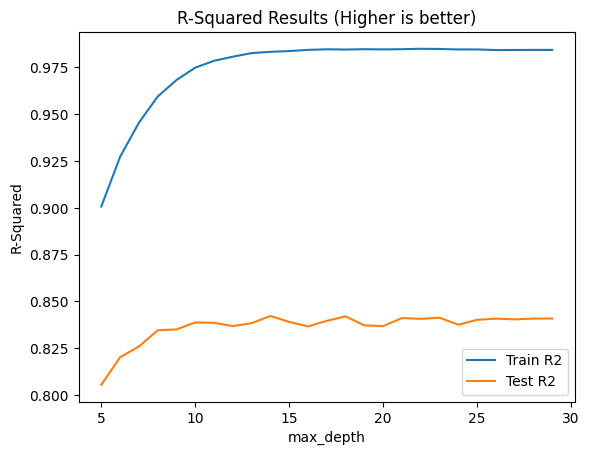

In [191]:
# Getting list of r2 cols to plot
r2_cols = [c for c in scores.columns if 'R2' in c]
ax = scores[r2_cols].plot()
ax.set(ylabel='R-Squared',xlabel='max_depth', title='R-Squared Results (Higher is better)');

In [192]:
# Best max_depth for R-squared (higher is better)
scores['Test R2'].idxmax()

14

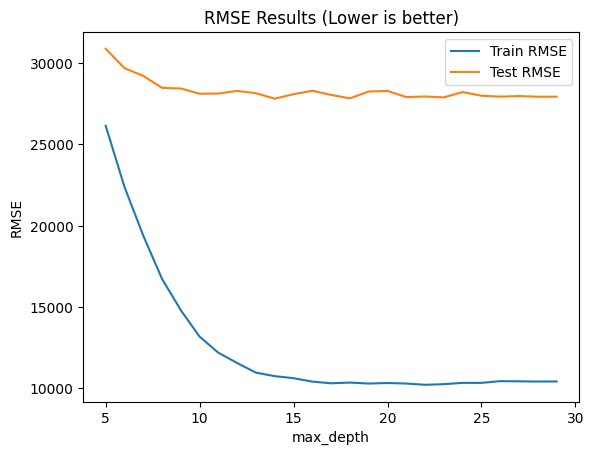

In [193]:
# Getting list of RMSE cols to plot
rmse_cols = [c for c in scores.columns if 'RMSE' in c]
ax = scores[rmse_cols].plot()
ax.set(ylabel='RMSE',xlabel='max_depth', title='RMSE Results (Lower is better)');

In [194]:
# Best max_depth for RMSE (lower is better)
scores['Test RMSE'].idxmin()

14

In [195]:
# Fitting a final model with max_depth from loop
rf_reg = RandomForestRegressor(random_state=42, max_depth=14)
rf_reg_pipe = make_pipeline(col_transformer, rf_reg)
rf_reg_pipe.fit(X_train, y_train);
evaluate_regression(rf_reg_pipe, X_train, y_train, X_test,y_test)

------------------------------------------------------------
Regresion Metrics: Training Data
------------------------------------------------------------
MAE = 6,806.36
MSE = 115,699,514.43
RMSE = 10,756.37
R^2 = 0.98
------------------------------------------------------------
Regresion Metrics: Test Data
------------------------------------------------------------
MAE = 17,016.02
MSE = 772,681,975.33
RMSE = 27,797.16
R^2 = 0.84


<a name='phase5'></a>
# Phase 5) Evaluation

### Best Model
>**Which model/result(s) should we provide to our stakeholders?**

- While our Random Forest model had the best performance on the training data ( R^2=0.98 and RMSE = \$ 10,756.37), the test performance was much lower (R^2 = 0.84, RMSE= \$ 27,797.16 ). It was very over fit to the training data, even after tuning max_depth.

- While the LinearRegression performed worse on the training data compared to the RandomForest (R^2=0.83, RMSE = \$ 33,939.03),tt performed equally well on the training and test data (R^2 = 0.83, RMSE = 29,166.52). 
It was not overfit and had consistent performance.




> **Do the results meet the stakeholder’s success criteria?**


Not quite yet. Our stakeholders wanting some insights and recommendations, as well. (See phase 6 below).

<a name='phase6'></a>
# Phase 6) Deployment (Recommendations)

In [196]:
plt.style.use(('ggplot','tableau-colorblind10'))
sns.set_context(context='notebook', font_scale=1.1)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

### Overall Quality 

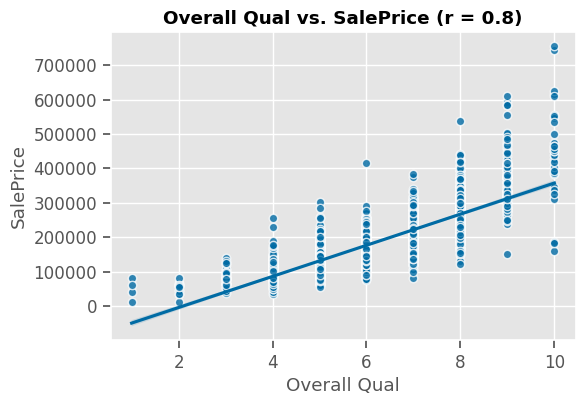

In [197]:
plot_numeric_vs_target(df, "Overall Qual",'SalePrice');

- The overall quality of the materials of the home were strongly correlated with higher Sale price. 


- We recommend paying for higher quality construction materials when remodeling your home, to increase its Sale Price.

### Living Area Sqft

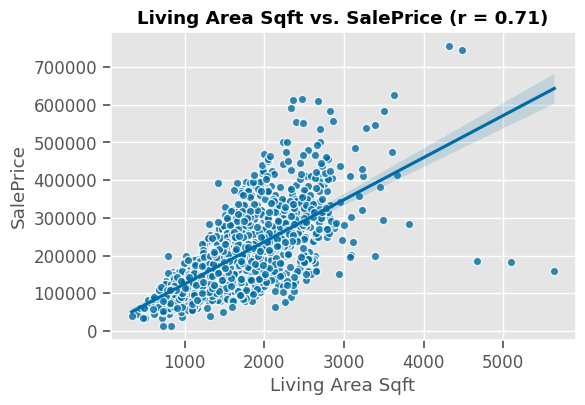

In [198]:
plot_numeric_vs_target(df, "Living Area Sqft",'SalePrice');

- The size of the living area (in square-feet) was also strongly positively correlated with Sale Price. 



- We recommend expanding the size of your living area in your home. This could be done by adding on to the home, or by repurposing unifinished areas of the home into liveable space.


### Central Air

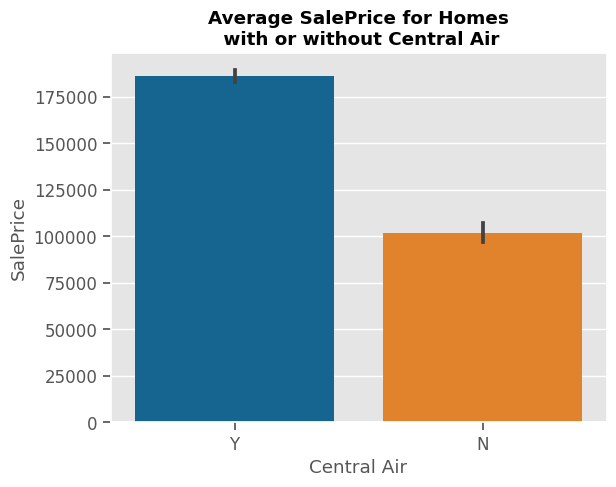

In [199]:
ax = sns.barplot(data=df, x='Central Air', y='SalePrice');
ax.set_title("Average SalePrice for Homes\n with or without Central Air",
             fontweight='semibold');

In [200]:
# Get means corresponding to plot
df.groupby("Central Air")['SalePrice'].mean()

Central Air
N    101890.479592
Y    186483.877835
Name: SalePrice, dtype: float64

- Homes that have Central Air conditioning sell for ~\$85,000 more than homes without central air.



- We recommend adding Central Air conditioning to your home, if you do not have it already.